#**Classical Machine Learning: Coursework 1 by Group 15**
##This group consists of the following members:


##1.   Abin Varghese - K2275285
##2.   Neha Gupta - K2263969
##3.   Muskan Asmath - K2279003



# Import Libraries and Dataset


In [ ]:
!pip install --upgrade scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
!pip install bkmeans

In [ ]:
import random
import numpy as np                                                         # numpy for number crunching
import seaborn as sns                                                      # seaborn for visualization
import matplotlib.pyplot as plt                                            # also for visualization
from sklearn import utils                                                  # importing the utilities
from sklearn.datasets import load_wine as lw                               # importing the wine dataset from the sklearn library
from sklearn import preprocessing                                          # importing for preprocessing the data
from sklearn.preprocessing import MinMaxScaler as mms                      # minmax scaler for normalizing between 0 and 1
from sklearn.preprocessing import StandardScaler                           # standardization
from sklearn.cluster import KMeans, DBSCAN, Birch, AgglomerativeClustering, BisectingKMeans # importing the clustering algorithms
from sklearn.decomposition import PCA                                      # PCA for dimensionality reduction
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer     # yellowbrick for visualizing
from sklearn.neighbors import KNeighborsClassifier                         # K-Nearest Neighbor Classifier
from sklearn.svm import SVC                                                # Support Vector Classifier
from sklearn.naive_bayes import GaussianNB                                 # Naive Bayes Classifier
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier                            # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier as rfc                 # Random Forest Classifier
from sklearn.model_selection import train_test_split as tts                # To split the dataset
from sklearn.model_selection import cross_val_score                        # K fold cross validation
from scipy.cluster.hierarchy import dendrogram, linkage                    # Hierarchical clustering
from sklearn.metrics import (accuracy_score, confusion_matrix,             # a few metrics for evaluation
                             silhouette_score, precision_score, f1_score, roc_auc_score,
                             classification_report,ConfusionMatrixDisplay, 
                             v_measure_score, adjusted_rand_score, 
                             calinski_harabasz_score, davies_bouldin_score, roc_curve, auc, RocCurveDisplay)

import warnings                                                            # used to ignore the warnings
warnings.filterwarnings("ignore")

#### <i>NOTE: We decided to wrap the entire functionalities and all attributes in a class for reusability and scaling. We did so keeping in mind the best practices of Agile Secure Software Development Cycle (SSDC).

# <i> PART I – Application: Load and overview data related to your theme (Group Submission)

The application should be able to load the data and identify its key aspects:<br>
• number of samples/instances<br>
• number of dimensions/features/attributes<br>
• number of classes<br>
• names of classes<br>
• number of samples per class

In [ ]:
class WineDataset:
  def __init__(self) -> None:
    return None
  
  # method to find number of samples/instances
  def find_samples(self, dataset) -> str:
    print(f'There are {dataset.data.shape[0]} samples in the wine dataset.')
    return '*--------*--------*--------*--------*--------*\n'
  
  # method to find number of dimensions/features/attributes
  def find_info(self, dataset) -> str:

    print(f'There are {dataset.data.ndim} dimensions in the wine dataset, and there are {dataset.data.shape[1]} predictive features in the wine dataset.\n' \
    'The predictive features are as follows:')
    i = 1
    for feature in dataset.feature_names:
      print(f'{i}. {feature}')
      i += 1
    return '\n*--------*--------*--------*--------*--------*\n'

  # method to find number of classes
  def find_number_classes(self, dataset) -> str:
    print(f'There are {np.unique(dataset.target).size} classes/types in the wine dataset.')
    return '*--------*--------*--------*--------*--------*\n'

  # method to find names of classes
  def find_names_classes(self, dataset) -> str:
    print(f'The following are the names of classes in the wine dataset:\n {dataset.target_names}')
    return '*--------*--------*--------*--------*--------*\n'

  # method to find number of samples per class
  def find_number_samples_per_class(self, dataset) -> str:
    # creating a dictionary to keep the count of samples in each class
    d = {'0': 0,
         '1': 0,
         '2': 0}

    # the logic to keep the count of samples in each class
    for i in range(dataset.data.shape[0]):
      if dataset.target[i] == 0:
        d['0'] += 1
      elif dataset.target[i] == 1:
        d['1'] += 1
      elif dataset.target[i] == 2:
        d['2'] += 1
    
    print(f"class_0 has {d['0']} samples.")
    print(f"class_1 has {d['1']} samples.")
    print(f"class_2 has {d['2']} samples.")

    return '*--------*--------*--------*--------*--------*\n'

In [ ]:
# importing the wine dataset and storing it in the lw reference variable
lw = lw()

In [ ]:
# creating an object of the WineDataset class
wine = WineDataset()

# printing the required aspects as per the coursework
# by ivoking the methods of the WineDataset class
print(wine.find_samples(lw))
print(wine.find_info(lw))
print(wine.find_number_classes(lw))
print(wine.find_names_classes(lw))
print(wine.find_number_samples_per_class(lw))

There are 178 samples in the wine dataset.
*--------*--------*--------*--------*--------*

There are 2 dimensions in the wine dataset, and there are 13 predictive features in the wine dataset.
The predictive features are as follows:
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

*--------*--------*--------*--------*--------*

There are 3 classes/types in the wine dataset.
*--------*--------*--------*--------*--------*

The following are the names of classes in the wine dataset:
 ['class_0' 'class_1' 'class_2']
*--------*--------*--------*--------*--------*

class_0 has 59 samples.
class_1 has 71 samples.
class_2 has 48 samples.
*--------*--------*--------*--------*--------*



# <i> PART II – Application: Clustering (Group Submission)

### We selected the following clustering algorithms to partition the dataset:


1.  K-Means
2.  DBSCAN 
3.   BIRCH
4.   Agglomerative Clustering
5.  Divisive Clustering
6.   EM-GMM





## **1. K-Means**

In [ ]:
class Implement_KMeans:

  def __init__(self) -> None:
    return None

  # method to display the histograms of the predictive features for visualization
  def show_features_histogram(self, dataset) -> str:
    print('FEATURES HISTORGRAM ==>\n')
    column_names = dataset.feature_names
    x = dataset.data
    for feature in range(13):
      plt.style.use('ggplot')
      plt.hist(x[:, feature], bins = 35)     # selecting all the rows and the specific predictive feature
      plt.title(column_names[feature])
      plt.show()
    return '*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n'
    
        
  # method to normalize the data
  def normalize_data(self, dataset) -> np.ndarray:
    # Here, we notice that scales of values of each predictive feature is different.
    # Therefore, we decided to normalize it before we move further.
    # here we used the MinMax scaler to normalize the dataset so that we could
    # have values between 0 and 1.
    data = dataset.data
    scaler = mms() 
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data
    

  # method to show the correlation matrix
  def show_correlation(self, dataset) -> None:
    scaled_data = self.normalize_data(dataset)    # it is paramount to normalize the dataset
    correlation_matrix = np.corrcoef(scaled_data)
    print(f'Correlation matrix ==>\n{correlation_matrix}')
    
    '''    
    # since nobody wants to view the tables, we will use the heatmap
    fig, ax = plt.subplots(figsize=(8, 8))
    heatmap = sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)
    plt.show()
    '''

  # method to display the most efficient number of clusters
  def show_optimal_k(self, dataset):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++')
    scaled_data = self.normalize_data(dataset)
    label = kmeans.fit_predict(scaled_data)
    unique_labels = np.unique(label)
    visualizer = KElbowVisualizer(kmeans, k=(2,10))

    visualizer.fit(scaled_data)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

  def evaluate_using_silhouette_method(self, dataset):
    predictive_features = dataset.data
    target = dataset.target
    #fig, ax = plt.subplots(3, 2, figsize=(15,8))
    for i in range(2, 10):
        '''
        Create KMeans instances for different number of clusters
        '''
        km = KMeans(n_clusters = i, init='k-means++')
        #q, mod = divmod(i, 2)
        '''
        Create SilhouetteVisualizer instance with KMeans instance
        Fit the visualizer
        '''
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
        #print(visualizer.silhouette_score)
        visualizer.fit(predictive_features)
        visualizer.show()
    


  def evaluate_using_calinski_harabasz_index(self, dataset):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++')
    scaled_data = self.normalize_data(dataset)
    label = kmeans.fit_predict(scaled_data)
    print(calinski_harabasz_score(scaled_data, label))

  def evaluate_using_davis_bouldin_index(self, dataset):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++')
    scaled_data = self.normalize_data(dataset)
    label = kmeans.fit_predict(scaled_data)
    print(davies_bouldin_score(scaled_data, label))

  def evaluate_using_internal_methods(self, dataset):
    print('EVALUATING USING THE SILHOUETTE COEFFICIENT ==>')
    self.evaluate_using_silhouette_method(dataset)
    print('\n\nEVALUATING USING THE CALINSKI HARABASZ INDEX ==>')
    self.evaluate_using_calinski_harabasz_index(dataset)
    print('\n\nEVALUATING USING THE DAVIS BOULDIN INDEX ==>')
    self.evaluate_using_davis_bouldin_index(dataset)

  def evaluate_using_v_measure(self, dataset):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++')
    scaled_data = self.normalize_data(dataset)
    label = kmeans.fit_predict(scaled_data)
    labels = kmeans.labels_
    print(v_measure_score(dataset.target, labels))

  def evaluate_using_adjusted_rand_index(self, dataset):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++')
    scaled_data = self.normalize_data(dataset)
    label = kmeans.fit_predict(scaled_data)
    labels = kmeans.labels_
    print(adjusted_rand_score(dataset.target, labels))

  def evaluate_using_external_methods(self, dataset):
    print('EVALUATING USING THE V MEASURE ==>')
    self.evaluate_using_v_measure(dataset)
    print('\n\nEVALUATING USING THE ADJUSTED RAND INDEX ==>')
    self.evaluate_using_adjusted_rand_index(dataset)
          
  # method to implement K-Means clustering algorithm
  def implement_k_means(self, dataset):
    print( self.show_features_histogram(dataset))
    #print('*--------*--------*--------*--------*--------*\n')
    print('NORMALIZED DATASET ==>\n', self.normalize_data(dataset), '\n')
    print('*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n')
    kmeans = KMeans(n_clusters = 3, init = 'k-means++')
    scaled_data = self.normalize_data(dataset)
    label = kmeans.fit_predict(scaled_data)
    unique_labels = np.unique(label)
    print('PRINTING THE SCATTER PLOTS OF PREDICTIVE FEATURES IN PAIRS AFTER CLUSTERING ==>\n\n')
    #plt.figure(figsize = (9, 9))

    for feature_1 in range(13):
      for feature_2 in range(feature_1):
        for i in unique_labels:
          plt.scatter(scaled_data[label == i, feature_1], scaled_data[label == i, feature_2], label = i)    
        plt.xlabel(f'{dataset.feature_names[feature_1]}')
        plt.ylabel(f'{dataset.feature_names[feature_2]}')
        plt.legend()
        plt.title('K Means clustering')
        plt.show()
        print('*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n\n')

    print('PRINTING THE FIRST 5 ROWS OF EACH OF THE 3 CLUSTERS ==>\n')
    cluster_1 = scaled_data[kmeans.labels_ == 0]
    print('CLUSTER 1:', cluster_1[:5, :], '\n')

    cluster_2 = scaled_data[kmeans.labels_ == 1]
    print('CLUSTER 2:', cluster_2[:5, :], '\n')

    cluster_3 = scaled_data[kmeans.labels_ == 2]
    print('CLUSTER 3:', cluster_3[:5, :], '\n')

    return '*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n\n'

## Training

FEATURES HISTORGRAM ==>



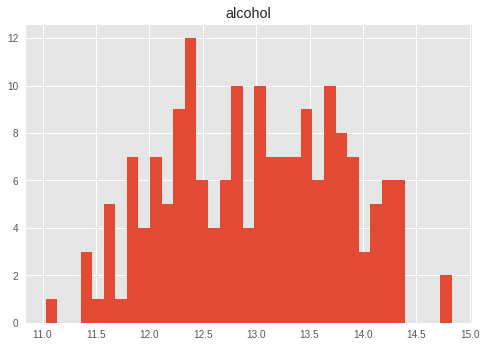

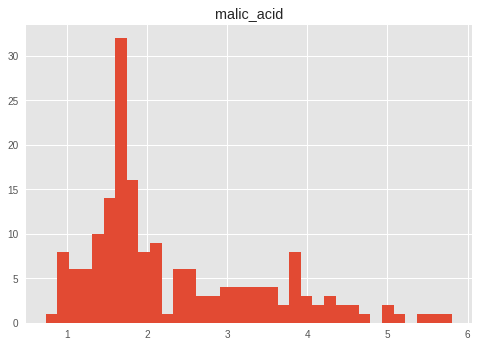

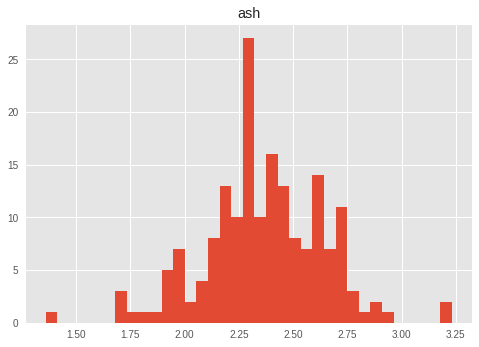

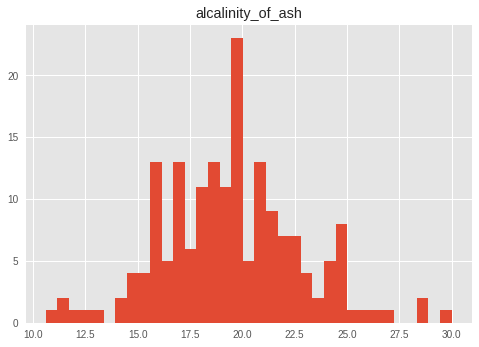

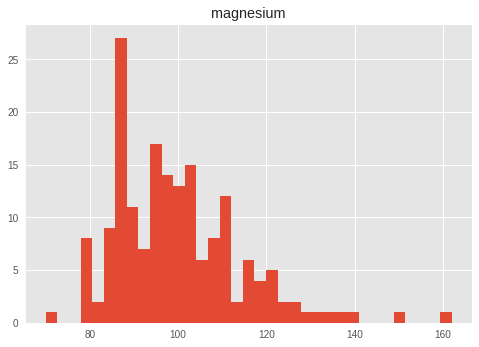

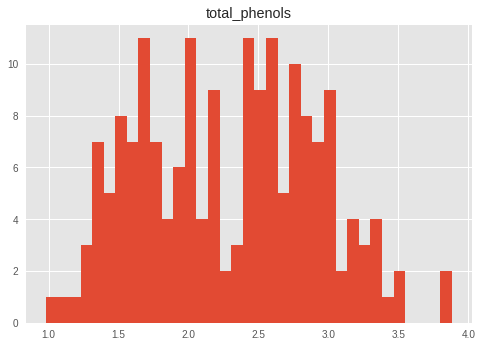

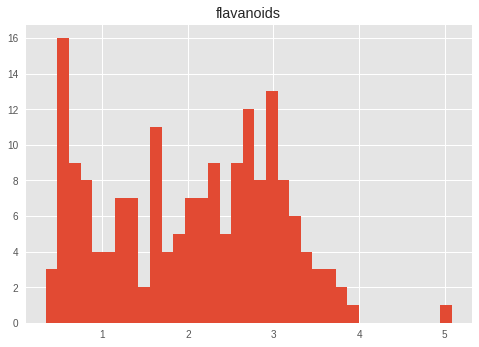

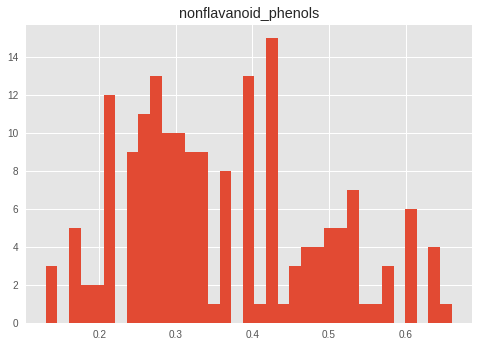

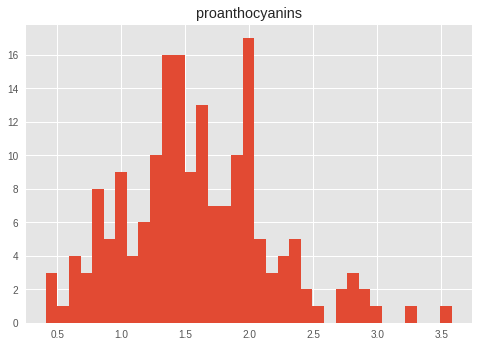

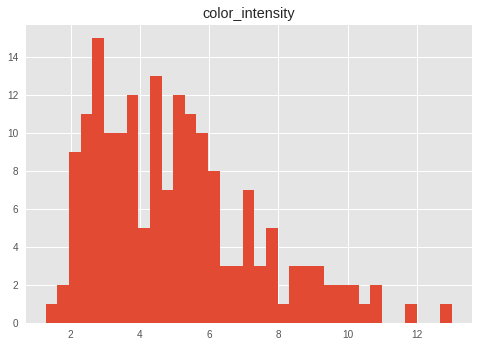

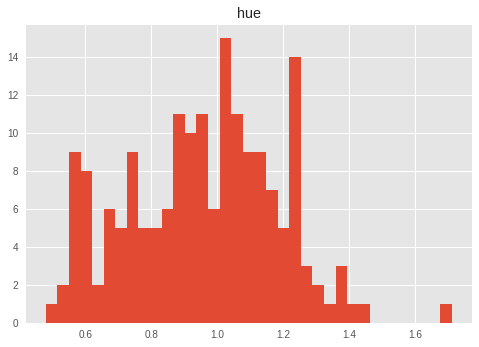

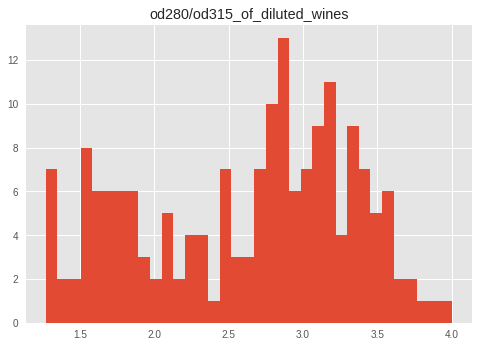

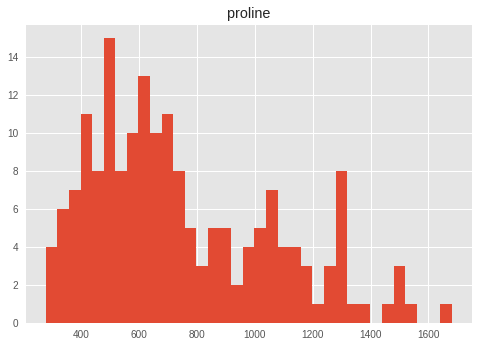

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

NORMALIZED DATASET ==>
 [[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]] 

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

PRINTING THE SCATTER PLOTS OF PREDICTIVE FEATURES IN PAIRS AFTER CLUSTERING ==>




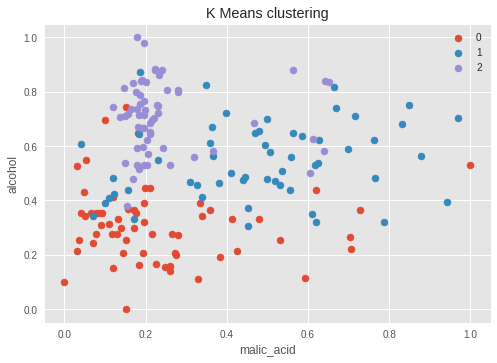

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




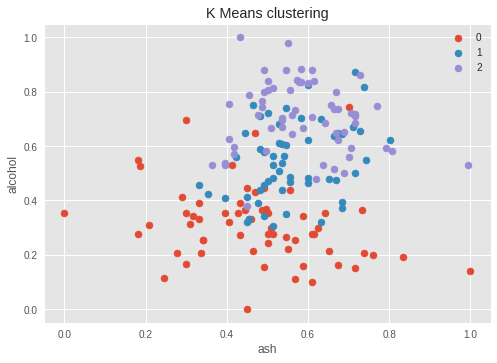

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




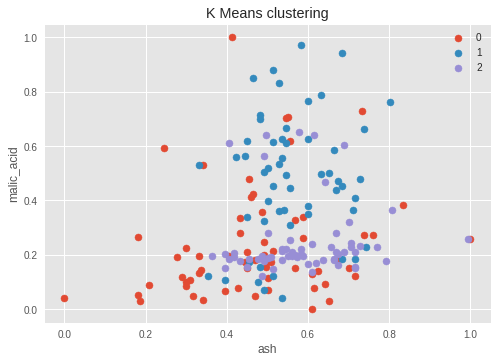

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




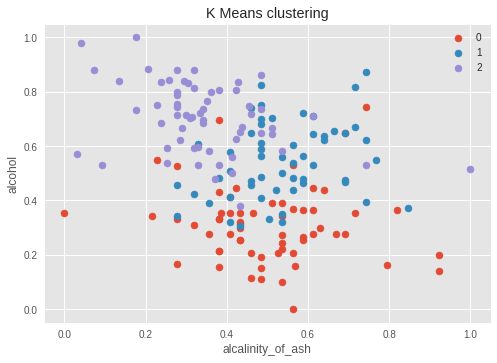

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




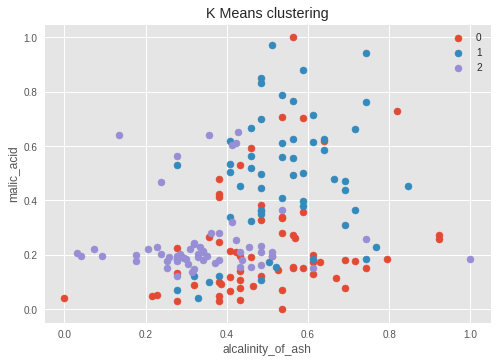

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




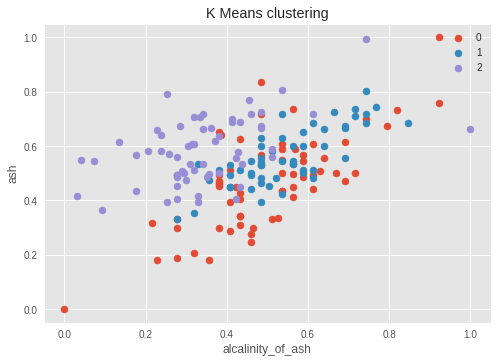

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




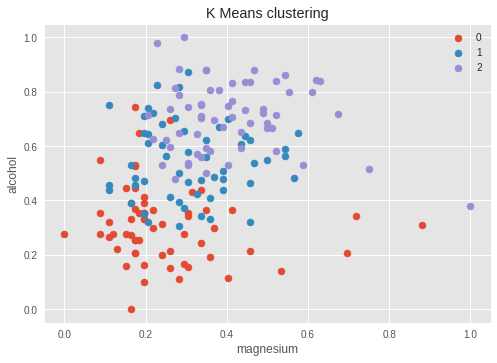

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




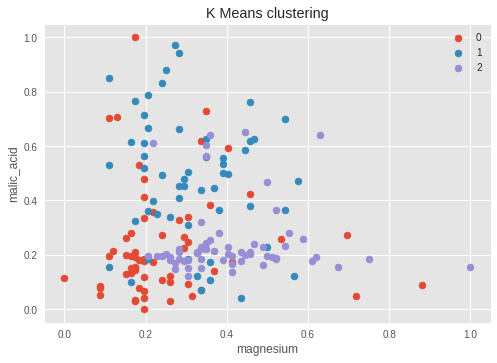

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




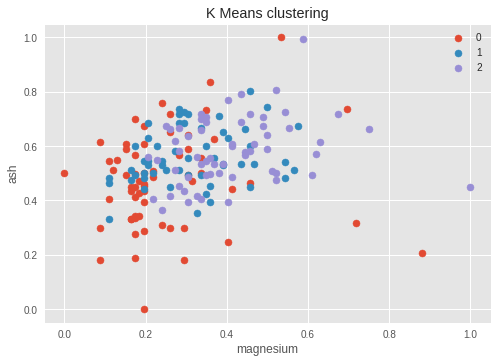

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




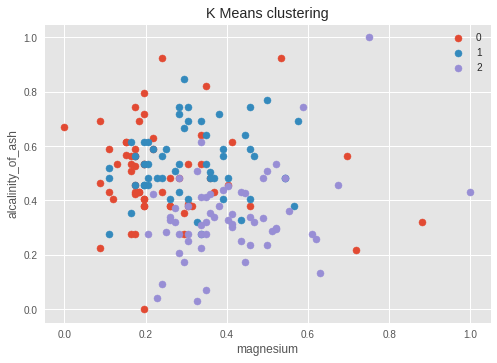

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




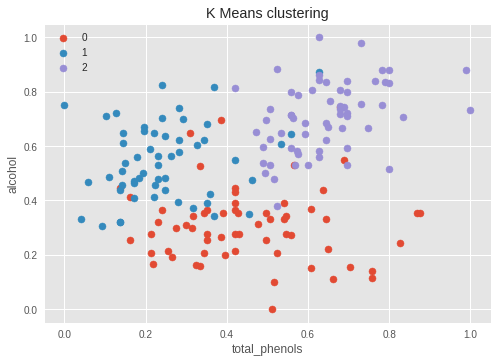

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




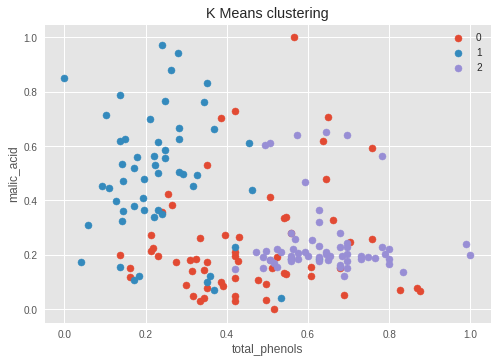

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




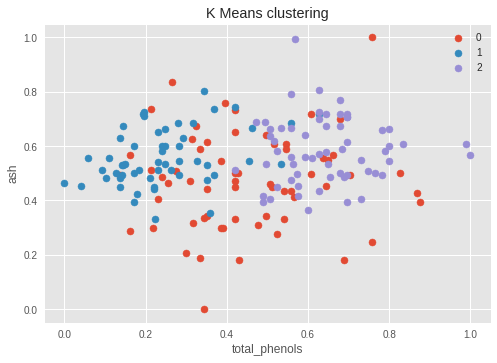

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




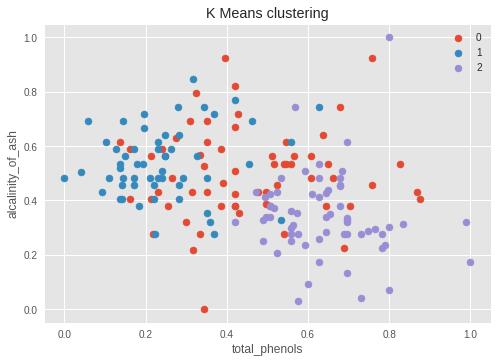

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




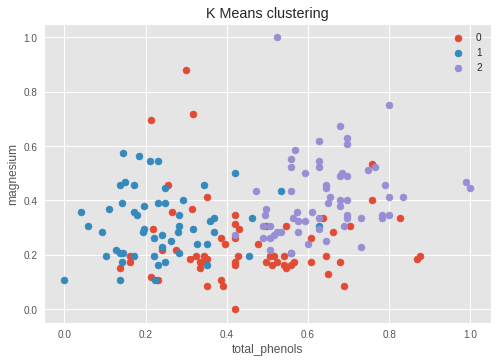

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




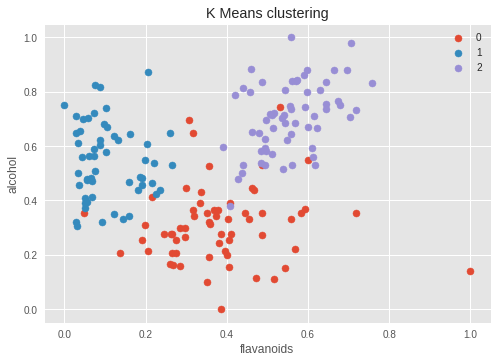

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




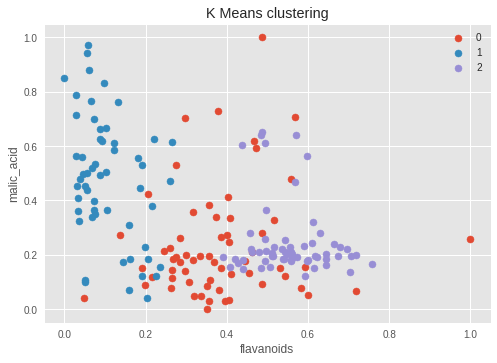

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




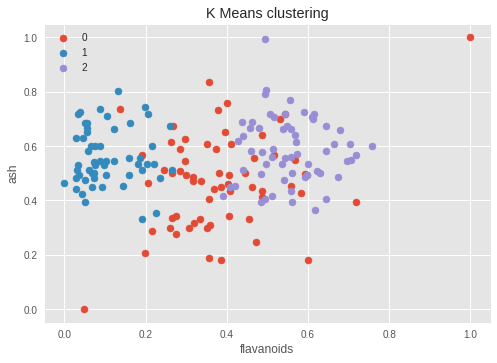

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




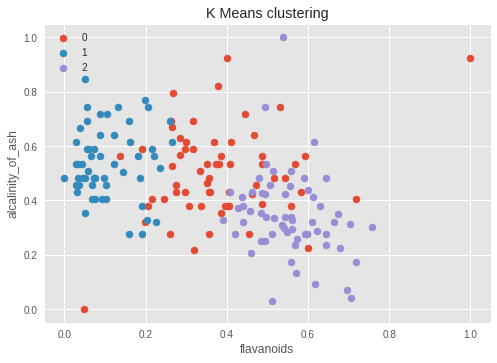

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




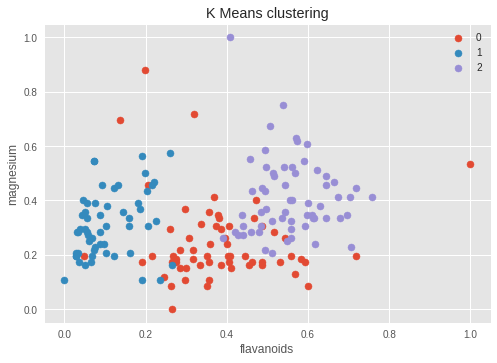

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




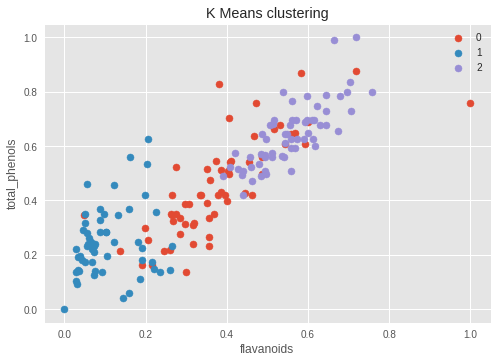

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




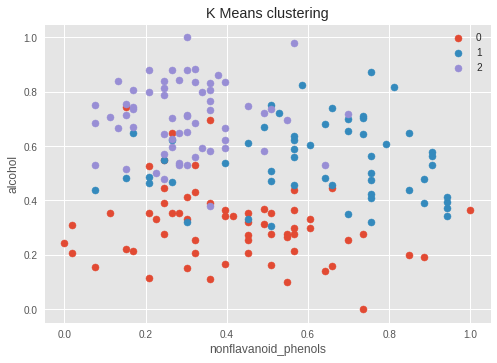

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




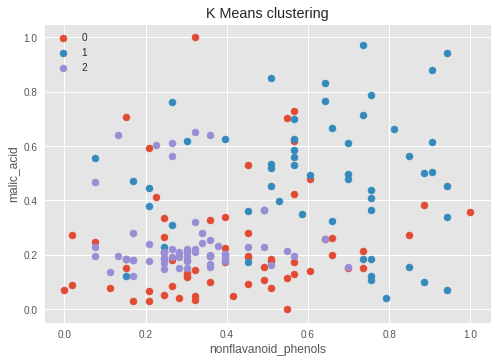

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




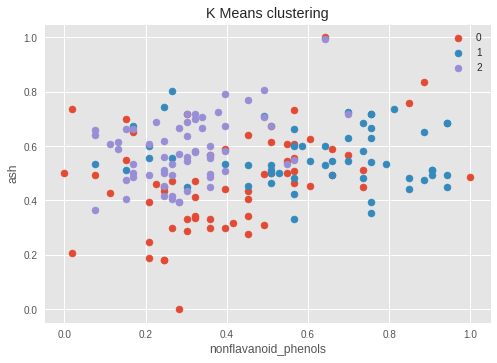

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




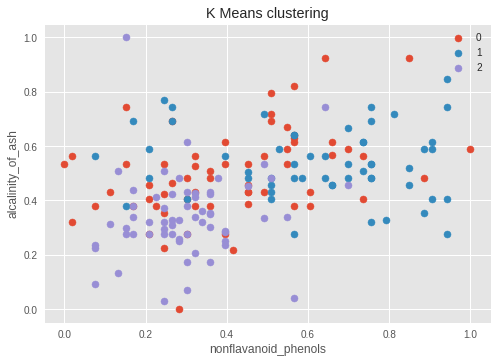

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




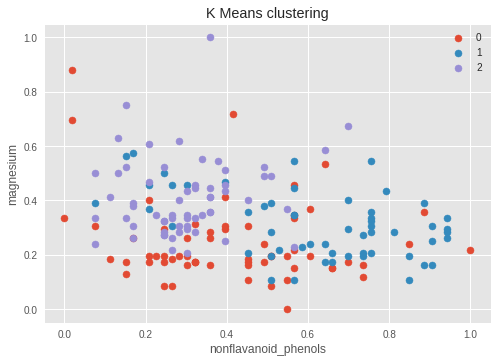

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




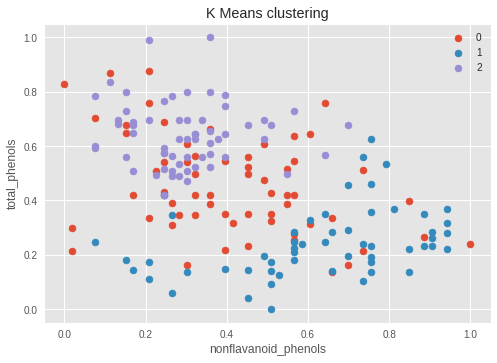

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




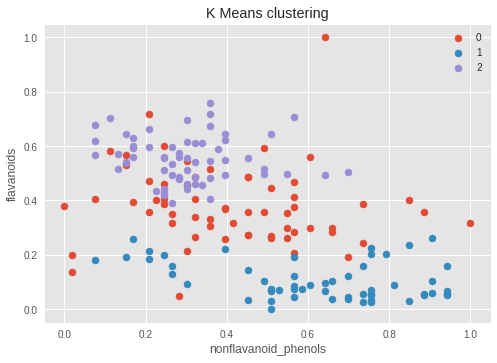

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




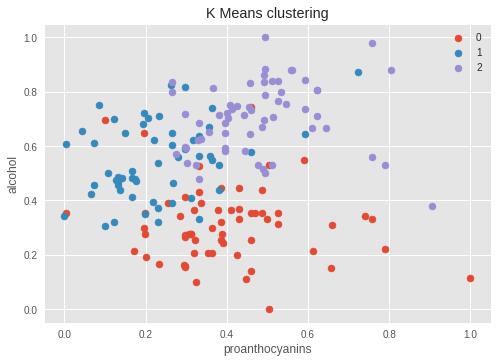

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




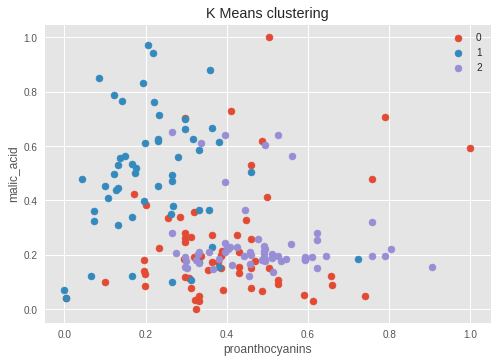

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




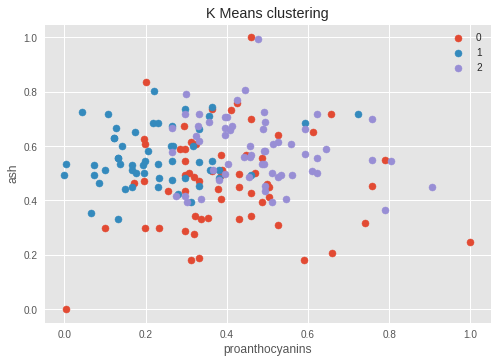

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




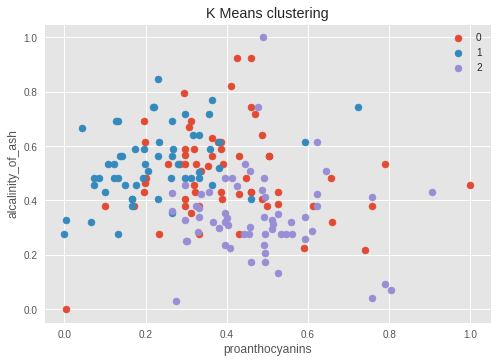

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




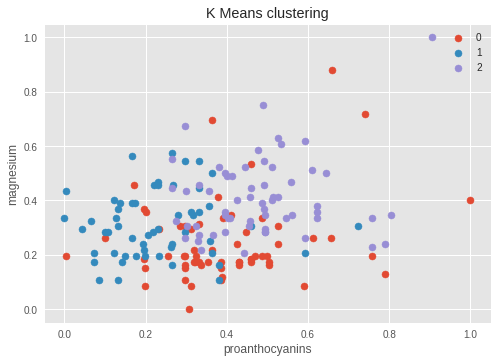

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




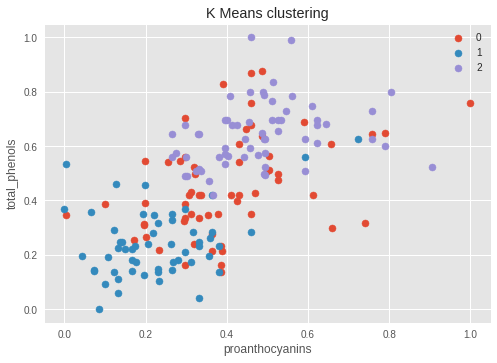

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




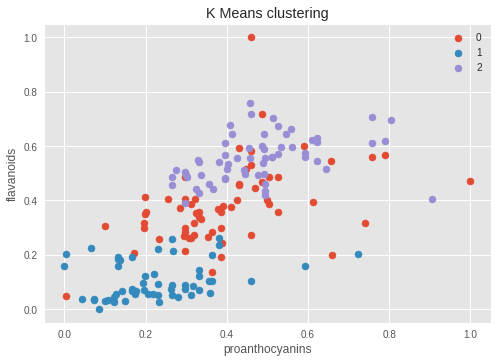

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




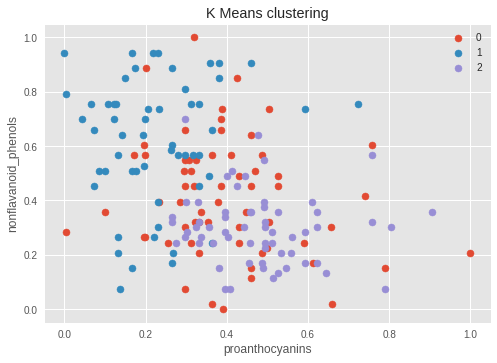

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




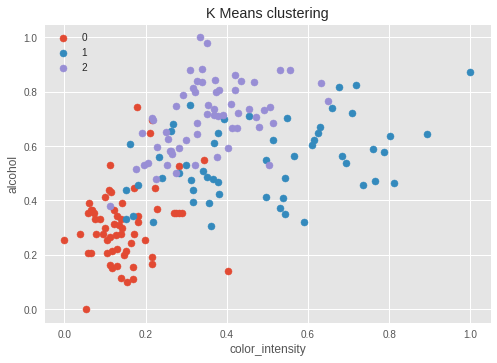

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




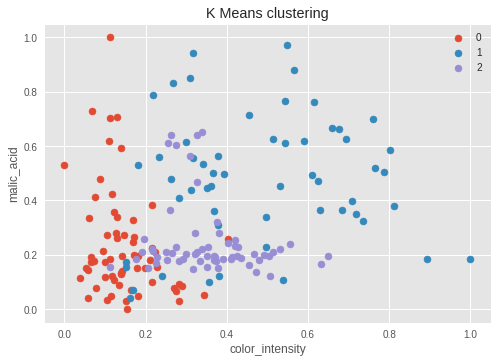

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




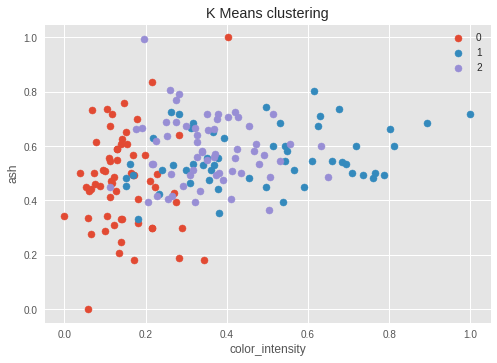

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




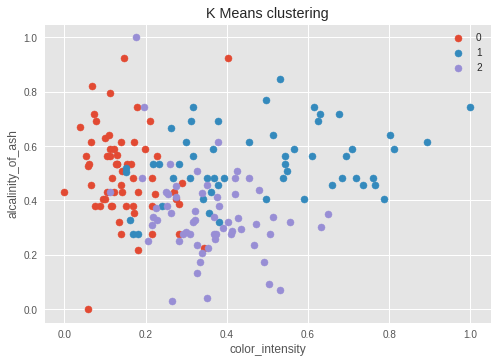

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




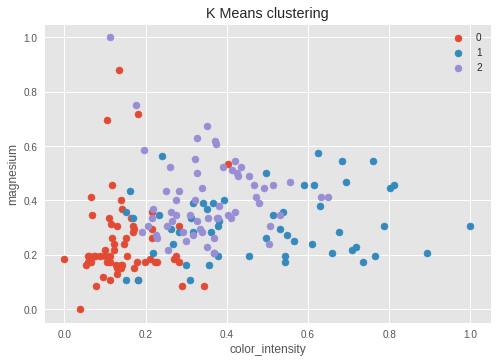

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




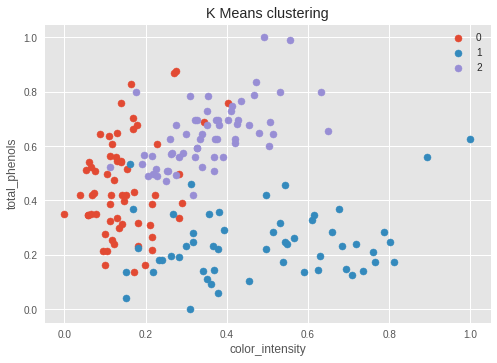

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




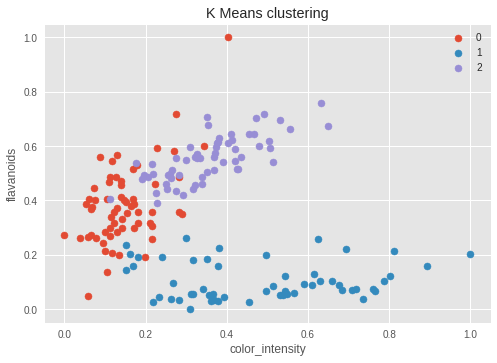

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




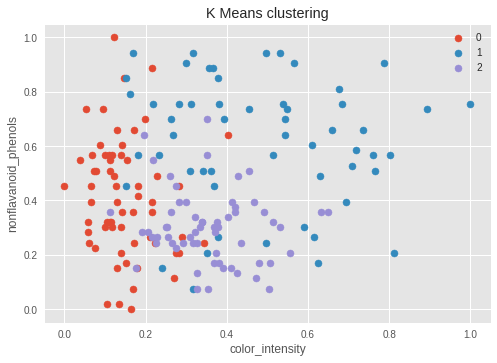

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




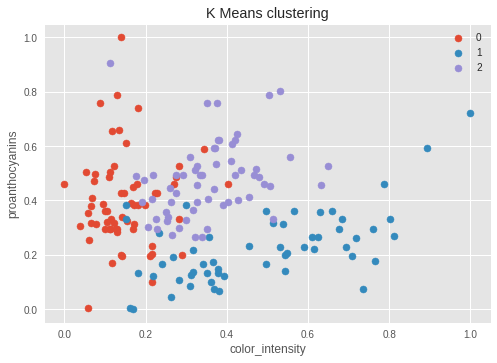

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




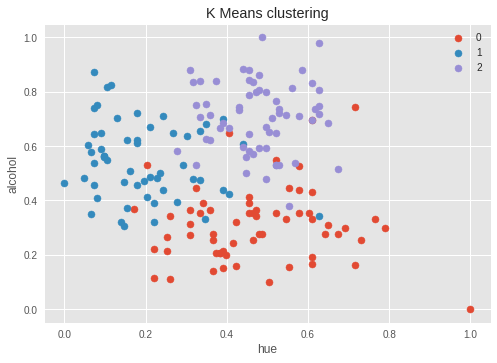

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




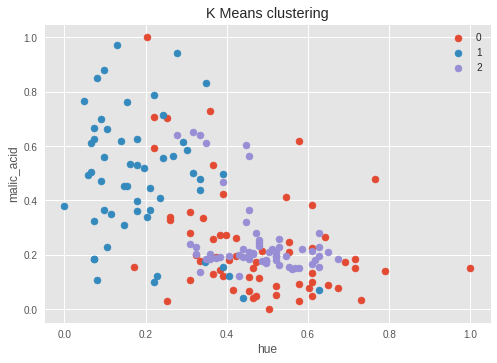

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




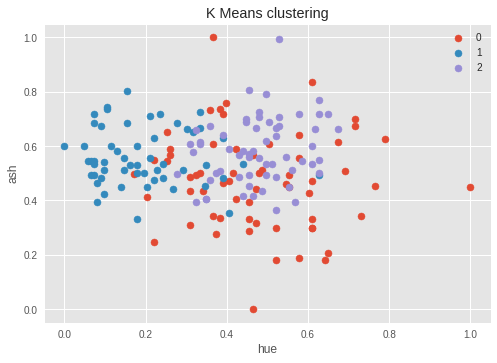

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




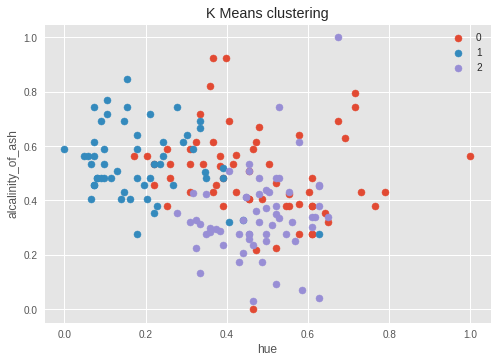

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




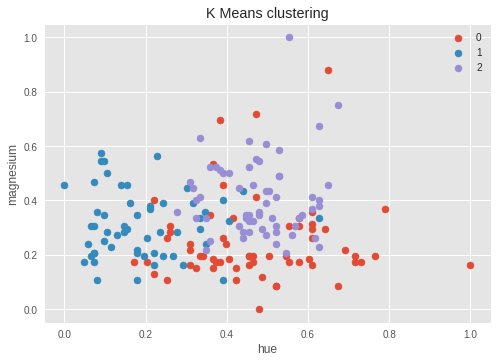

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




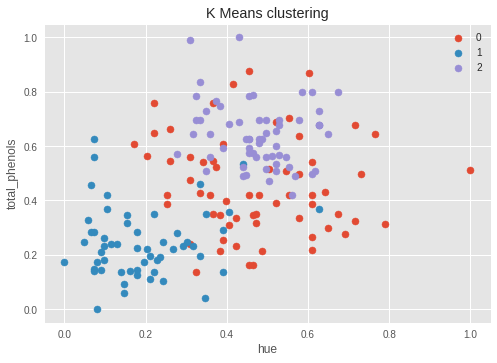

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




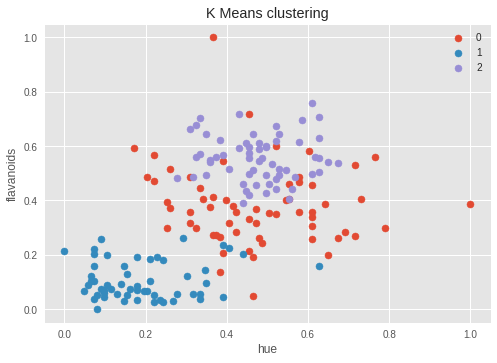

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




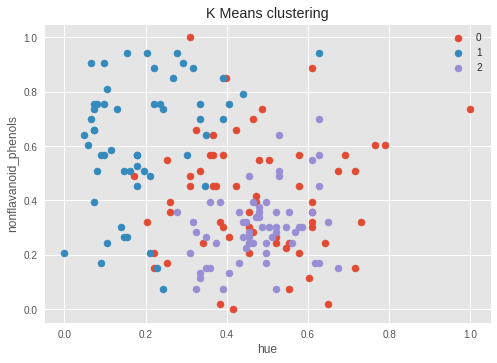

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




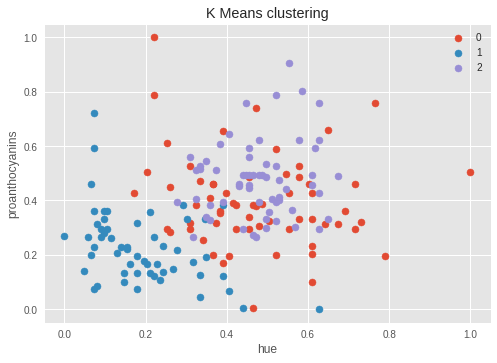

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




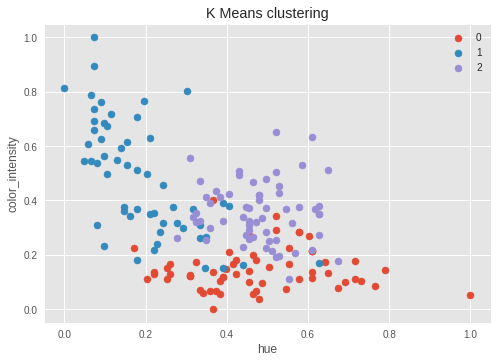

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




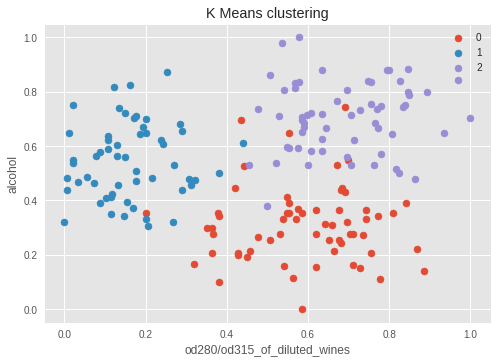

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




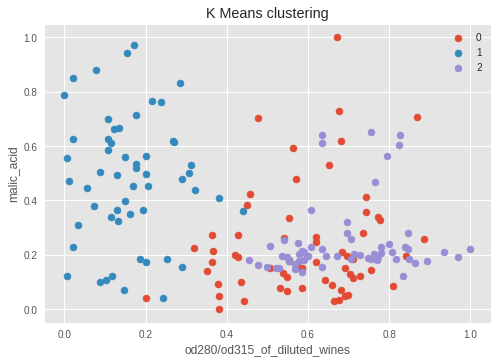

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




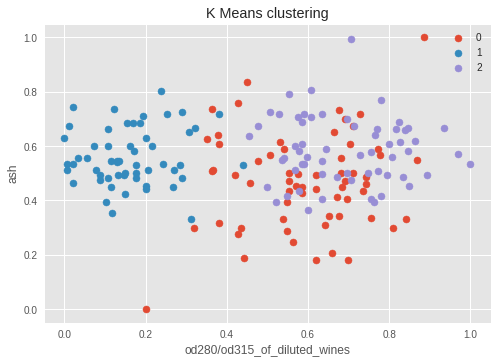

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




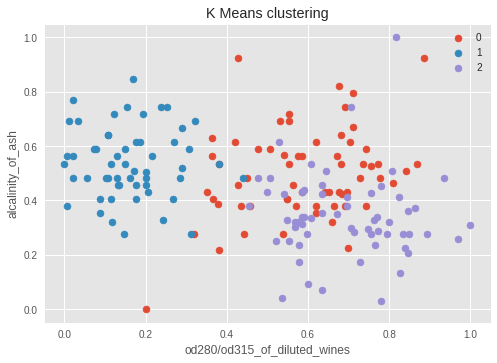

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




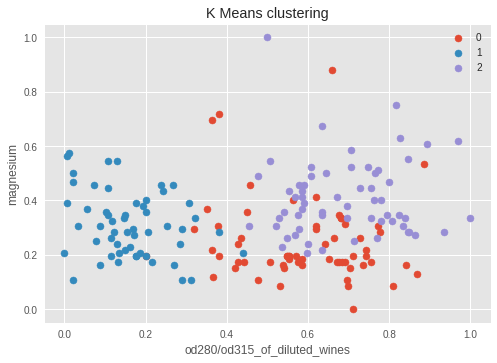

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




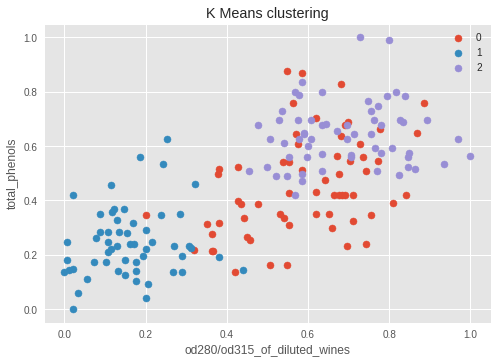

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




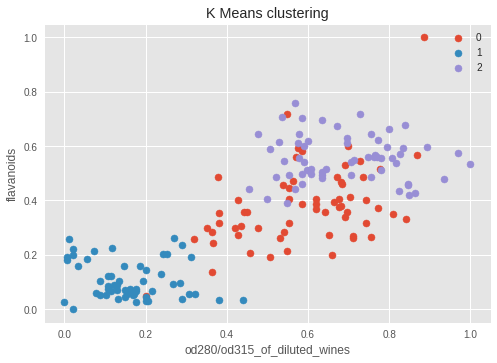

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




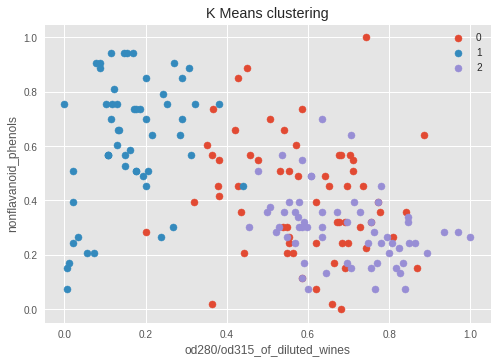

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




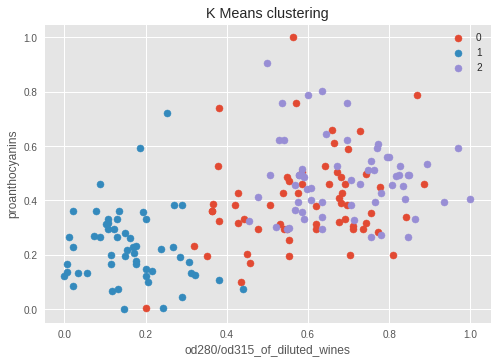

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




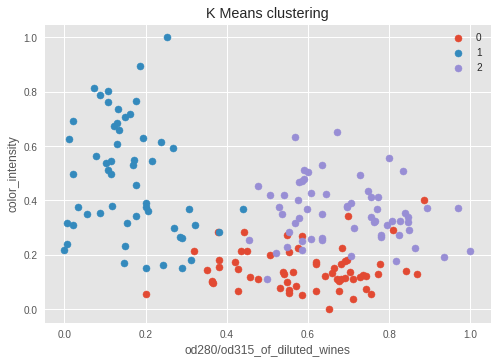

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




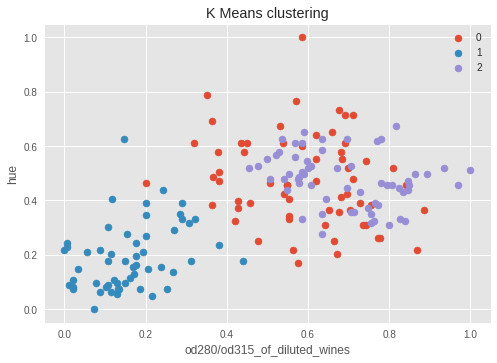

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




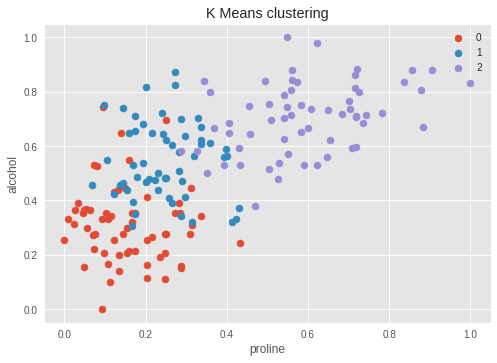

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




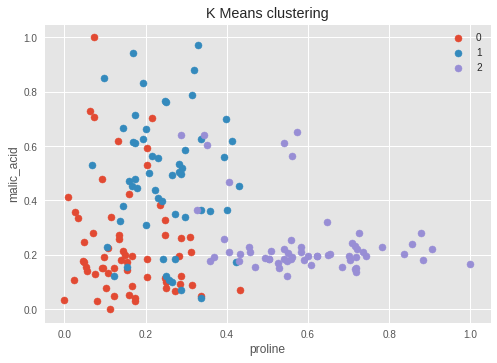

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




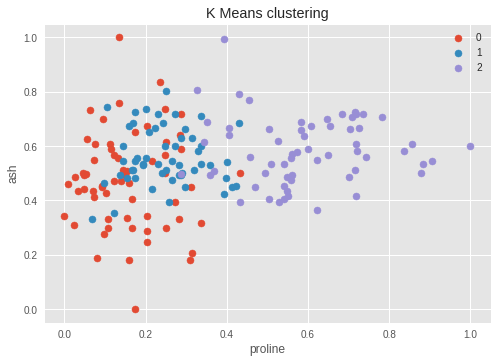

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




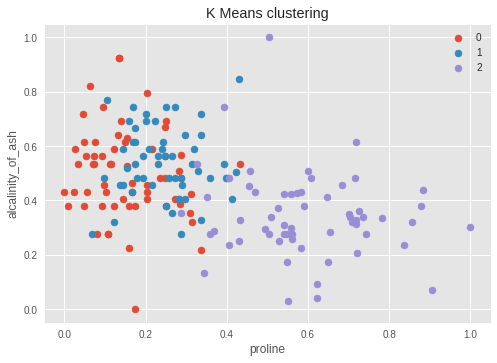

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




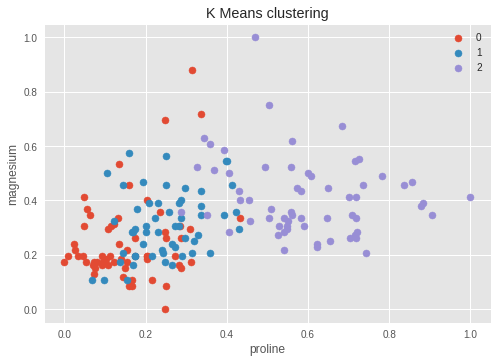

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




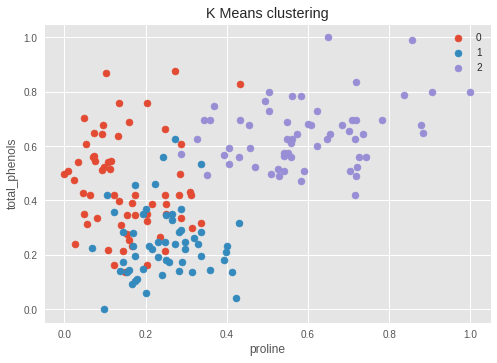

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




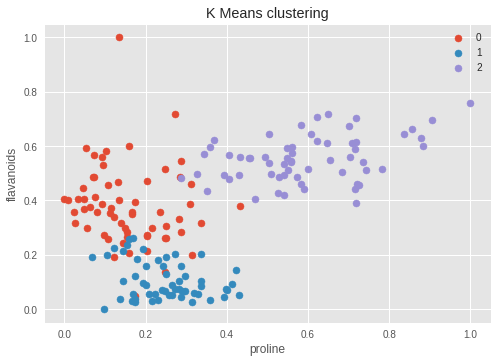

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




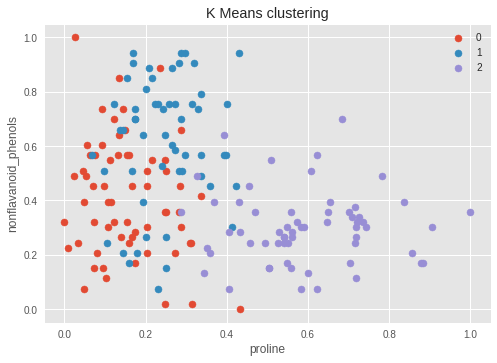

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




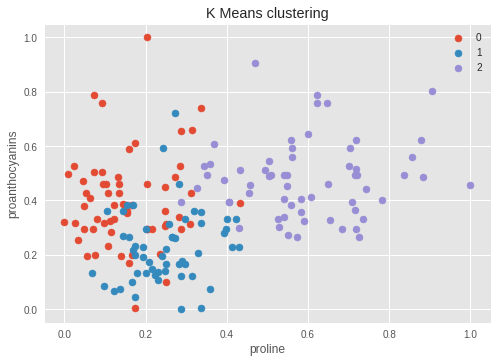

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




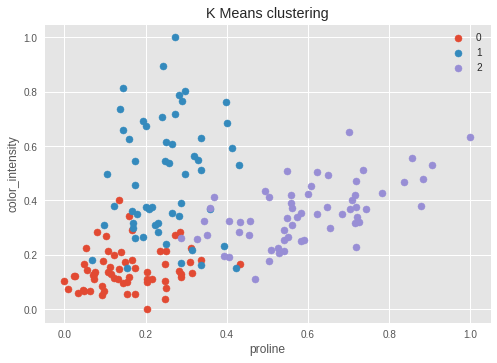

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




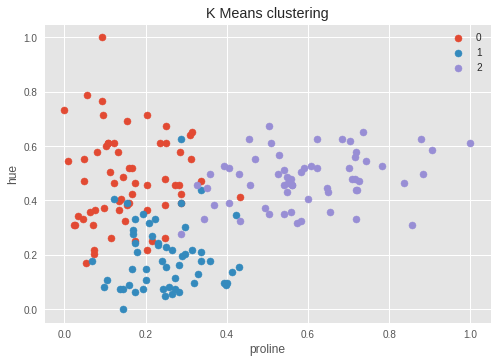

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*




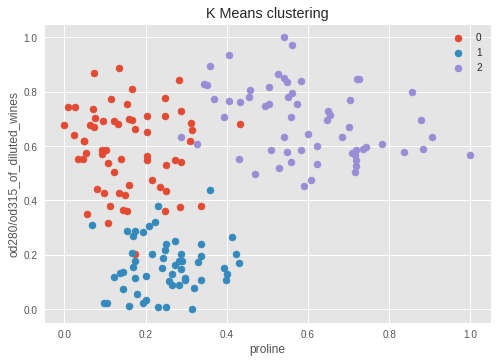

*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*


PRINTING THE FIRST 5 ROWS OF EACH OF THE 3 CLUSTERS ==>

CLUSTER 1: [[0.35263158 0.03952569 0.         0.         0.19565217 0.34482759
  0.04852321 0.28301887 0.00315457 0.05716724 0.46341463 0.2014652
  0.17261056]
 [0.69473684 0.10079051 0.29946524 0.3814433  0.26086957 0.3862069
  0.30590717 0.35849057 0.10094637 0.21501706 0.6097561  0.43589744
  0.2510699 ]
 [0.35263158 0.0770751  0.42780749 0.43298969 0.18478261 0.86896552
  0.58227848 0.11320755 0.46056782 0.27047782 0.60162602 0.58608059
  0.10128388]
 [0.3        0.14031621 0.62566845 0.43298969 0.36956522 0.3137931
  0.29746835 0.60377358 0.1955836  0.14249147 0.78861789 0.35164835
  0.05492154]
 [0.35263158 0.09288538 0.64171123 0.38659794 0.30434783 0.49655172
  0.48734177 0.45283019 0.52681388 0.28327645 0.57723577 0.37728938
  0.2853067 ]] 

CLUSTER 2: [[0.34210526 0.07114625 0.49197861 0.27835052 0.33695652 0.36896552
  0.15822

In [ ]:
kmeans = Implement_KMeans()
print(kmeans.implement_k_means(lw))

## Evaluation

**Evaluation using the Elbow Method**

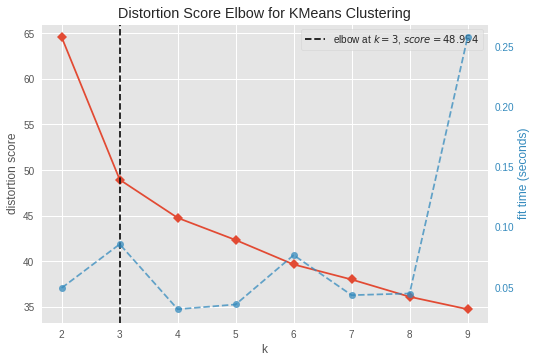

None


In [ ]:
print(kmeans.show_optimal_k(lw))

**Evaluation using the Silhouette Method**

EVALUATING USING THE SILHOUETTE COEFFICIENT ==>


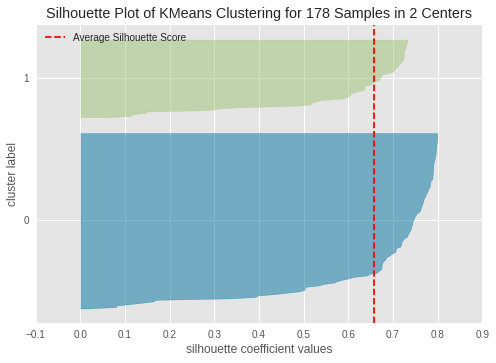

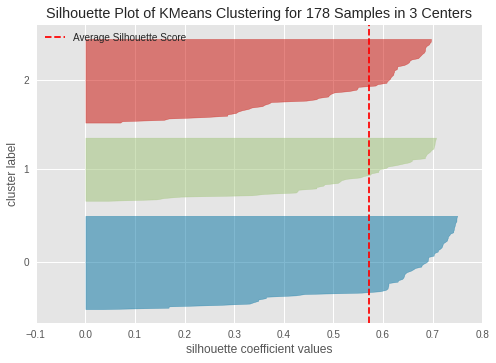

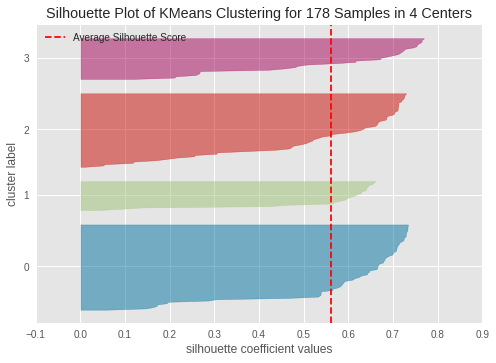

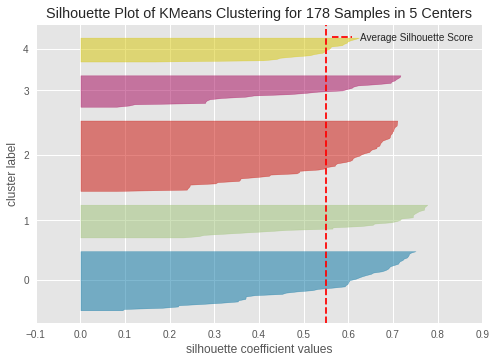

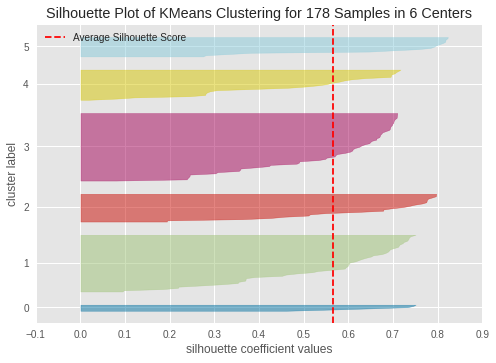

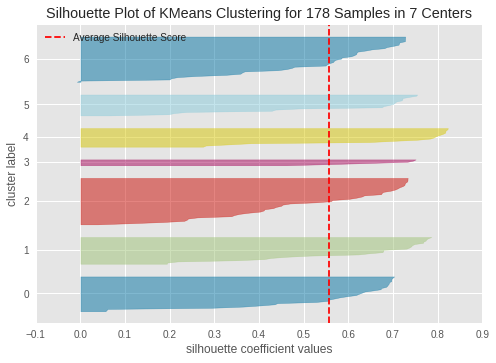

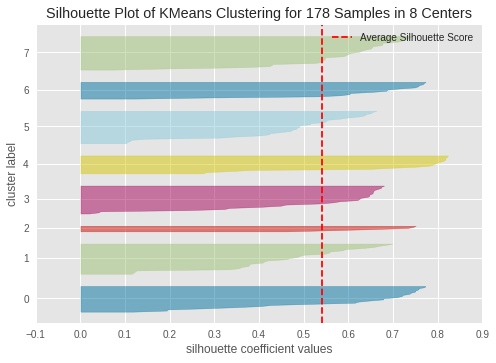

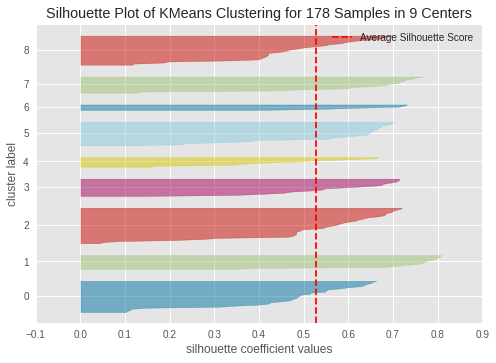



EVALUATING USING THE CALINSKI HARABASZ INDEX ==>
83.35112750771908


EVALUATING USING THE DAVIS BOULDIN INDEX ==>
1.305317989484142


In [ ]:
kmeans.evaluate_using_internal_methods(lw)

In [ ]:
kmeans.evaluate_using_external_methods(lw)

EVALUATING USING THE V MEASURE ==>
0.8416799159471821


EVALUATING USING THE ADJUSTED RAND INDEX ==>
0.8685425493202144


## **2. DBSCAN**
Density-Based Spatial Clustering of Application with Noise algorithm



In [ ]:
# Feature Scaling done using the MinMax scaler to normalize the dataset to have values between 0 and 1. 
dataset = lw
data = lw.data
scaler = mms() 
scaler.fit(data)
scaled_data = scaler.transform(data)   

In [ ]:
# Principal Component Analysis (PCA)  used to reduce noise and the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(scaled_data)

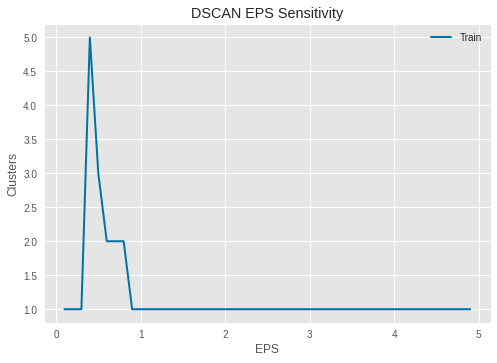

In [ ]:
# Identify the Epsilon value to choose
# maximum distance between two samples for one to be considered as in the neighborhood of the other.

#parameter range and score lists
eps_range = np.arange(0, 5,0.1)[1:] # value ranges from 0.1 to 4.9
clusters = []

#Train a knn_model for every neighbour value in list
for i in range(len(eps_range)):
    dbscan=DBSCAN(eps = eps_range[i],min_samples=5,algorithm='auto',p=2).fit(scaled_data) # p=2 -> Euclidean distance
    clusters.append(len((np.unique(dbscan.fit_predict(scaled_data)))))

#Plot result
plt.plot(eps_range,clusters,label="Train",linewidth=2, color='b') 
plt.legend()
plt.title('DSCAN EPS Sensitivity')
plt.xlabel('EPS')
plt.ylabel('Clusters')
plt.show()

In [ ]:
eps_list = [0.9, 0.7, 0.5, 0.3]
min_samples_list = [2, 3, 4, 5, 6, 7]  

print('For the purpose of finding an appropriate value of Epsilon and Min_Samples, the optimal of clusters with')
print('minimum noise are calculated using a list of different values of eps and minimum samples for DBSCAN')

for i in range(len(eps_list)):  
  for j in range(len(min_samples_list)):
    
    db = DBSCAN(eps=eps_list[i], min_samples=min_samples_list[j]).fit(scaled_data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    if n_clusters_ > 1:
      print("\nEPS: "+str(eps_list[i])+", minimum Sample:",str(min_samples_list[j]))
      print("Estimated number of clusters: %d" % n_clusters_)
      print("Estimated number of noise points: %d" % n_noise_)

  

For the purpose of finding an appropriate value of Epsilon and Min_Samples, the optimal of clusters with
minimum noise are calculated using a list of different values of eps and minimum samples for DBSCAN

EPS: 0.5, minimum Sample: 2
Estimated number of clusters: 4
Estimated number of noise points: 18

EPS: 0.5, minimum Sample: 3
Estimated number of clusters: 2
Estimated number of noise points: 22

EPS: 0.5, minimum Sample: 4
Estimated number of clusters: 2
Estimated number of noise points: 23

EPS: 0.5, minimum Sample: 5
Estimated number of clusters: 2
Estimated number of noise points: 23

EPS: 0.5, minimum Sample: 6
Estimated number of clusters: 2
Estimated number of noise points: 29

EPS: 0.5, minimum Sample: 7
Estimated number of clusters: 2
Estimated number of noise points: 29

EPS: 0.3, minimum Sample: 2
Estimated number of clusters: 17
Estimated number of noise points: 128

EPS: 0.3, minimum Sample: 3
Estimated number of clusters: 7
Estimated number of noise points: 148

EPS: 0.

Training DBSCAN 

The following are 5 graphs after applying the DBSCAN with their appropriate values of
Epsilon and Min_Samples.


Epsilon: 0.5
Min_Samples: 3
Plot after applying DBSCAN ==>



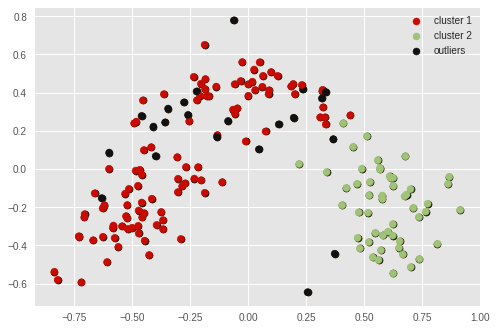



Epsilon: 0.5
Min_Samples: 4
Plot after applying DBSCAN ==>



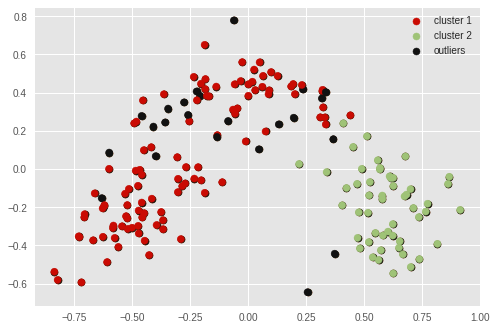



Epsilon: 0.5
Min_Samples: 5
Plot after applying DBSCAN ==>



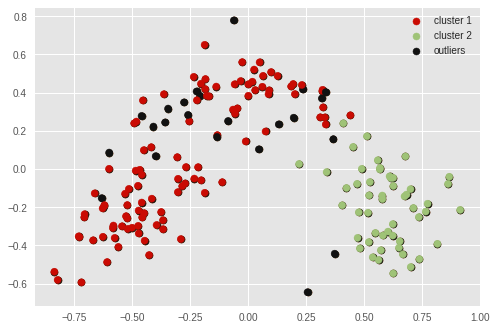



Epsilon: 0.5
Min_Samples: 6
Plot after applying DBSCAN ==>



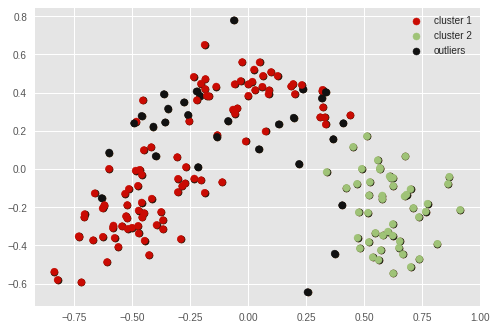



Epsilon: 0.5
Min_Samples: 7
Plot after applying DBSCAN ==>



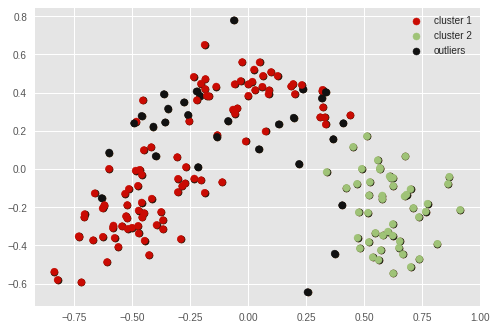

In [ ]:

eps_list = [0.5] #chosen value after above eps and min_samples optimal analysis
min_samples_list = [3,4,5,6,7]
print('The following are 5 graphs after applying the DBSCAN with their appropriate values of')
print('Epsilon and Min_Samples.')

for i in range(len(eps_list)): 
  for j in range(len(min_samples_list)):
    dbscan = DBSCAN(eps = eps_list[i], min_samples = min_samples_list[j])
    label = dbscan.fit_predict(scaled_data)            
    labels = dbscan.labels_
    print(f'\n\nEpsilon: {eps_list[i]}')
    print(f'Min_Samples: {min_samples_list[j]}')
    # Building the label to colour mapping
    colours = {}
    colours[-1] = 'k'
    colours[0] = 'r'
    colours[1] = 'g'

   
      
    # Building the colour vector for each data point
    cvec = [colours[label] for label in labels]
      
    # For the construction of the legend of the plot
    r = plt.scatter(X_principal[:, 0], X_principal[:, 1], color ='r');
    g = plt.scatter(X_principal[:, 0], X_principal[:, 1], color ='g');
    k = plt.scatter(X_principal[:, 0], X_principal[:, 1], color ='k');
      
    # Plotting P1 on the X-Axis and P2 on the Y-Axis 
    # according to the colour vector defined

    plt.scatter(X_principal[:, 0], X_principal[:, 1], c = cvec)
      
    # Building the legend
    print('Plot after applying DBSCAN ==>\n')
    plt.legend((r, g, k), ('cluster 1', 'cluster 2', 'outliers'))

    plt.show()

# Evaluation of DBSCAN

## Internal Evaluation Metrics

##Silhouette Coefficient 
This metric is used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.  

In [ ]:
max_sc = 0
for i in range(len(eps_list)): 
  for j in range(len(min_samples_list)):  
    dbscan = DBSCAN(eps = eps_list[i] , min_samples = min_samples_list[j])
    label = dbscan.fit_predict(scaled_data)            
    labels = dbscan.labels_
    sc = round(silhouette_score(scaled_data, labels),3)
    if sc >= max_sc:
      print(f'\nOptimal Epsilon: {eps_list[i]}')
      print(f'Optimal Min_Samples: {min_samples_list[j]}')
      print(f"Silhouette Coefficient with Noise as one cluster: {silhouette_score(scaled_data, labels):.3f}")
      mask = [x >= 0 for x in labels]
      max_sc = round(silhouette_score(scaled_data, labels),3)
      print(f"Silhouette Coefficient ignoring Noise: {silhouette_score(scaled_data[mask], labels[mask]):.3f}")


Optimal Epsilon: 0.5
Optimal Min_Samples: 3
Silhouette Coefficient with Noise as one cluster: 0.230
Silhouette Coefficient ignoring Noise: 0.336


##Calinski Harabasz Score
######Calinski Harabasz Score The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [ ]:

for i in range(len(eps_list)): 
  for j in range(len(min_samples_list)):  
    dbscan = DBSCAN(eps = eps_list[i] , min_samples = min_samples_list[j])
    label = dbscan.fit_predict(scaled_data)            
    labels = dbscan.labels_
  
    print(f'\nOptimal Epsilon: {eps_list[i]}')
    print(f'Optimal Min_Samples: {min_samples_list[j]}')
    print(f"Calinski Harabasz Score of DBSCAN clustering model is: {calinski_harabasz_score(scaled_data, labels):.3f}")


Optimal Epsilon: 0.5
Optimal Min_Samples: 3
Calinski Harabasz Score of DBSCAN clustering model is: 41.269

Optimal Epsilon: 0.5
Optimal Min_Samples: 4
Calinski Harabasz Score of DBSCAN clustering model is: 41.441

Optimal Epsilon: 0.5
Optimal Min_Samples: 5
Calinski Harabasz Score of DBSCAN clustering model is: 41.441

Optimal Epsilon: 0.5
Optimal Min_Samples: 6
Calinski Harabasz Score of DBSCAN clustering model is: 40.592

Optimal Epsilon: 0.5
Optimal Min_Samples: 7
Calinski Harabasz Score of DBSCAN clustering model is: 40.592


##Davies Bouldin Score
######Davies Bouldin Score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Hence, clusters which are farther apart and less dispersed will result in a better score.

In [ ]:

for i in range(len(eps_list)): 
  for j in range(len(min_samples_list)):  
    dbscan = DBSCAN(eps = eps_list[i] , min_samples = min_samples_list[j])
    label = dbscan.fit_predict(scaled_data)            
    labels = dbscan.labels_

    print(f'\nOptimal Epsilon: {eps_list[i]}')
    print(f'Optimal Min_Samples: {min_samples_list[j]}')
    print(f"Davies Bouldin score of DBSCAN clustering model is: {davies_bouldin_score(scaled_data, labels):.3f}")
    max_db = round(davies_bouldin_score(scaled_data, labels),3)
 


Optimal Epsilon: 0.5
Optimal Min_Samples: 3
Davies Bouldin score of DBSCAN clustering model is: 3.097

Optimal Epsilon: 0.5
Optimal Min_Samples: 4
Davies Bouldin score of DBSCAN clustering model is: 3.064

Optimal Epsilon: 0.5
Optimal Min_Samples: 5
Davies Bouldin score of DBSCAN clustering model is: 3.064

Optimal Epsilon: 0.5
Optimal Min_Samples: 6
Davies Bouldin score of DBSCAN clustering model is: 3.154

Optimal Epsilon: 0.5
Optimal Min_Samples: 7
Davies Bouldin score of DBSCAN clustering model is: 3.154


##External Evaluation Metrics

###V-Measure
#####This evaluation metric is independent of the number of class labels, the number of clusters, the size of the data and the clustering algorithm used and is a very reliable metric. Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling.

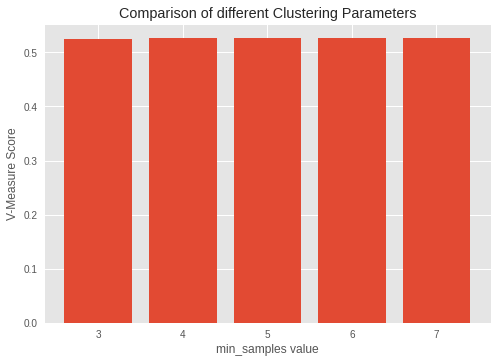

In [ ]:
 #V-Measure
from sklearn.metrics import v_measure_score

# List of V-Measure Scores for different models
v_scores = []

for i in range(len(eps_list)): 
  for j in range(len(min_samples_list)):  
    dbscan = DBSCAN(eps = eps_list[i] , min_samples = min_samples_list[j])
    label = dbscan.fit_predict(scaled_data)            
    labels = dbscan.labels_
    # Evaluating the performance
        # print(v_measure_score(dataset.target, labels))
    v_scores.append(v_measure_score(dataset.target, labels))
    #print(min_samples_list)
    #print(v_scores)
    #Plotting bar graph to compare the models
plt.bar(min_samples_list, v_scores)
plt.xlabel('min_samples value')
plt.ylabel('V-Measure Score')
plt.title('Comparison of different Clustering Parameters')
plt.show()

##Adjusted Rand Index

The Adjusted Rand Index is used to measure the similarity of datapoints presents in the clusters. So, this measure should be high as possible.


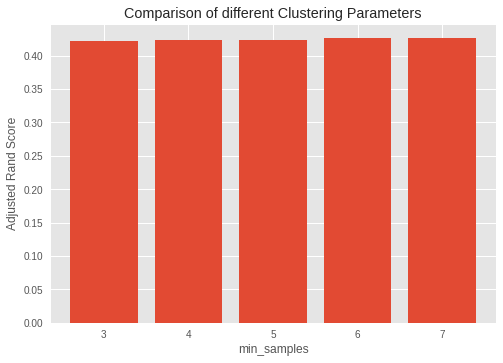

In [ ]:
# List of R Scores for different models
r_scores = []

for i in range(len(eps_list)): 
  for j in range(len(min_samples_list)):  
    dbscan = DBSCAN(eps = eps_list[i] , min_samples = min_samples_list[j])
    label = dbscan.fit_predict(scaled_data)            
    labels = dbscan.labels_
    r_scores.append(adjusted_rand_score(dataset.target, labels))
  

plt.bar(min_samples_list, r_scores)
plt.xlabel('min_samples')
plt.ylabel('Adjusted Rand Score')
plt.title('Comparison of different Clustering Parameters')
plt.show()

##** 3. BIRCH**
Balanced Iterative Reducing and Clustering Hierarchies


In [ ]:
# Feature Scaling done using the MinMax scaler to normalize the dataset to have values between 0 and 1. 
dataset = lw
data = lw.data
scaler = mms() 
scaler.fit(data)
scaled_data = scaler.transform(data)   

In [ ]:
# Principal Component Analysis (PCA) used to reduce noise and the dimensionality of the data to make it visualizable

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(scaled_data)

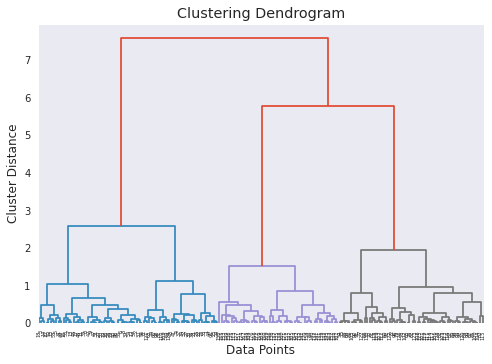

In [ ]:
#Creating Dendrogram to find the optimal number of clusters for BIRCH

linkage_data = linkage(X_principal, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')
plt.show()

# Training:

optimal number of clusters from above dendrogram: 3
Plot after applying DBSCAN ==>



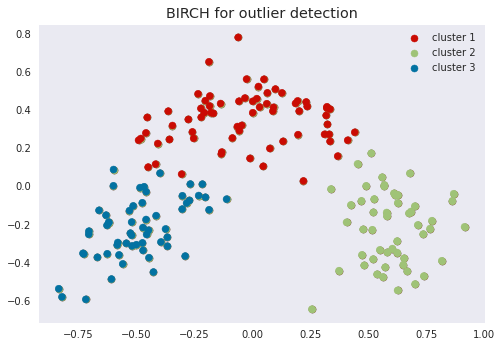

Silhouette Coefficient with  clusters: 0.293
Plot after applying DBSCAN ==>



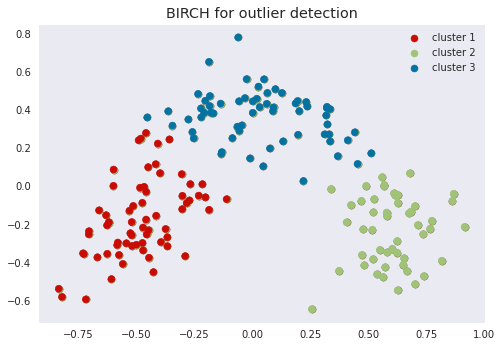

Silhouette Coefficient with  clusters: 0.296


In [ ]:
print("optimal number of clusters from above dendrogram: 3" )
optimal_clusters = 3 
Threshold_list = [0.5,0.4,0.3,0.2]
for i in range(2,len(Threshold_list)):

  model = Birch(branching_factor = 50 , n_clusters = optimal_clusters, threshold = Threshold_list[i])
  model.fit(X_principal)
  label = model.predict(X_principal)           
  labels = model.labels_
  #print(Threshold_list[i])
  #plt.scatter(data[:, 0], data[:, 1], c = pred)

    # Building the label to colour mapping
  colours = {}
  colours[0] = 'r'
  colours[1] = 'g'
  colours[2] = 'b'

   # Building the colour vector for each data point
  cvec = [colours[label] for label in labels]
    
  # For the construction of the legend of the plot
  b= plt.scatter(X_principal[:, 0], X_principal[:, 1], color ='b');
  r= plt.scatter(X_principal[:, 0], X_principal[:, 1], color ='r');
  g = plt.scatter(X_principal[:, 0], X_principal[:, 1], color ='g');
    

  plt.scatter(X_principal[:, 0], X_principal[:, 1], c = cvec)
  #fig = plt.figure(1)
  #ax = fig.add_subplot(111, facecolor='green')
  print('Plot after applying DBSCAN ==>\n')
  plt.title('BIRCH for outlier detection')
  plt.legend((r,g,b), ('cluster 1', 'cluster 2', 'cluster 3'))

  plt.show() 
  print(f"Silhouette Coefficient with  clusters: {silhouette_score(scaled_data, labels):.3f}")

# Evaluation:

## Internal Evaluation Metrics

##Silhouette Coefficient 
This metric is used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.  

In [ ]:
print(f"Silhouette Coefficient with  clusters: {silhouette_score(scaled_data, labels):.3f}")

Silhouette Coefficient with  clusters: 0.296


##Calinski Harabasz Score
######Calinski Harabasz Score The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [ ]:
print(f"Calinski Harabasz Score of DBSCAN clustering model is: {calinski_harabasz_score(scaled_data, labels):.3f}")

Calinski Harabasz Score of DBSCAN clustering model is: 82.473


##Davies Bouldin Score
#####Davies Bouldin Score defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Hence, clusters which are farther apart and less dispersed will result in a better score.

In [ ]:
print(f"Davies Bouldin score of DBSCAN clustering model is: {davies_bouldin_score(scaled_data, labels):.3f}")

Davies Bouldin score of DBSCAN clustering model is: 1.320


##External Evaluation Metrics

###V-Measure
#####This evaluation metric is independent of the number of class labels, the number of clusters, the size of the data and the clustering algorithm used and is a very reliable metric. Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling.

In [ ]:
 #V-Measure
v_score = v_measure_score(dataset.target, labels)
print("the V-Measure of BIRCH is:", v_score)



the V-Measure of BIRCH is: 0.8574893750907903


##Adjusted Rand Index

The Adjusted Rand Index is used to measure the similarity of datapoints presents in the clusters. So, this measure should be high as possible.


In [ ]:
# List of R Scores for model
r_score = adjusted_rand_score(dataset.target, labels)
print("the Adjusted Rand Index of BIRCH is:",r_score)


the Adjusted Rand Index of BIRCH is: 0.8617967592137037


## **4. Agglomerative Clustering**

In [ ]:
#To have values between 0 and 1 done feature scaling using the MinMax scaler to normalize data
dataset = lw
data = lw.data
scaler = mms() 
scaler.fit(data)
scaled_data = scaler.transform(data) 

In [ ]:
# Dimensionality of the data is reduced to make it visualizable
pca = PCA(n_components = 2).fit_transform(scaled_data)


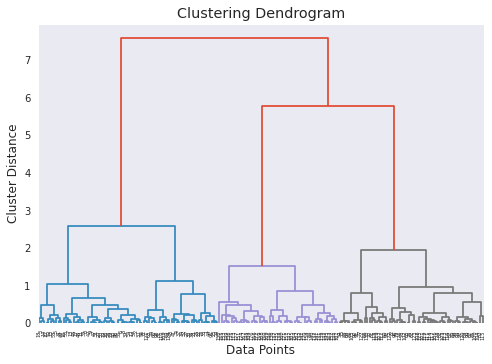

In [ ]:
#create dendrogram to find number of clusters
linkage_data = linkage(pca, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')
plt.show()



# **Training**

Scatter plot for predictive features

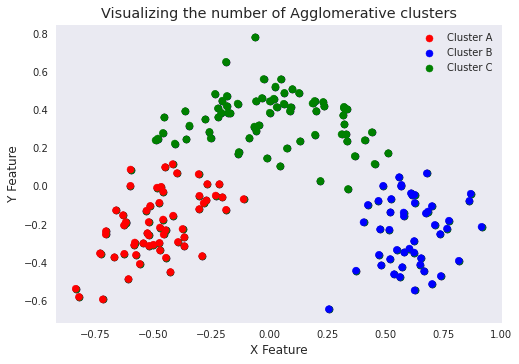

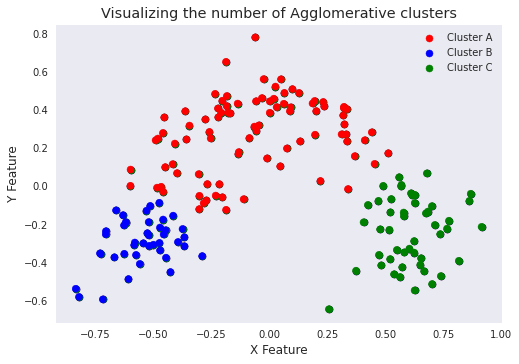

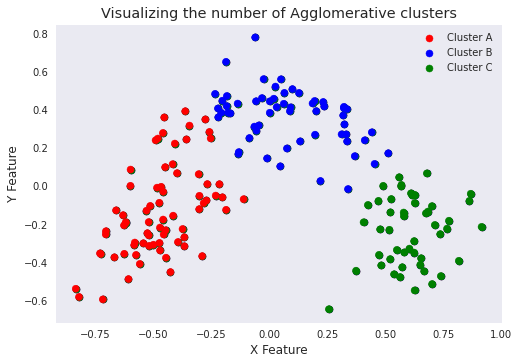

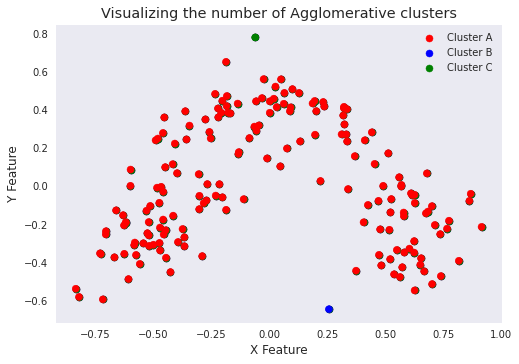

In [ ]:
#create list for each linkage value
link_list = ['average','complete','ward','single']

for i in range(len(link_list)):
    
    #trained the model on dataset
    model = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage =  link_list[i])
    l = model.fit_predict(pca) 
    labels = model.labels_
    
    #mapping color to label clusters
    colors = {}
    colors[0] = 'red'
    colors[1] = 'blue'
    colors[2] = 'green'
    
    #color for each data points
    cvec = [colors[l] for l in labels]
    
    #visulaize the cluster with scatter plot
    plt.scatter(pca[:, 0], pca[:, 1], color = 'red', label = 'Cluster A')
    plt.scatter(pca[:, 0], pca[:, 1], color = 'blue', label = 'Cluster B')
    plt.scatter(pca[:, 0], pca[:, 1], color = 'green', label = 'Cluster C')
    plt.scatter(pca[:, 0], pca[:, 1], c = cvec)
    plt.title('Visualizing the number of Agglomerative clusters')
    plt.xlabel('X Feature')
    plt.ylabel('Y Feature')
    plt.legend()
    plt.show()


# **Evaluation**

## **Internal Evaluation of Clustering**
## **Silhouette Score**

Silhouette Score ranges from -1 to 1. It is a metric which is used to determine how effective a clustering method is.

In [ ]:
for i in range(2,13):    
      aggloSilhCluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
      silhLabels = aggloSilhCluster.fit_predict(scaled_data)
    
      #Find the score of Silhouette Score
      silhouette_avg = silhouette_score(scaled_data, silhLabels)
      print("For n_clusters = {} The average silhouette_score is : {}".format (i,silhouette_avg)) 

For n_clusters = 2 The average silhouette_score is : 0.29666794582183303
For n_clusters = 3 The average silhouette_score is : 0.2948290632158541
For n_clusters = 4 The average silhouette_score is : 0.24870332075467336
For n_clusters = 5 The average silhouette_score is : 0.20415379209163967
For n_clusters = 6 The average silhouette_score is : 0.20778664056084095
For n_clusters = 7 The average silhouette_score is : 0.20489140267307707
For n_clusters = 8 The average silhouette_score is : 0.2110135279932449
For n_clusters = 9 The average silhouette_score is : 0.2120896726933339
For n_clusters = 10 The average silhouette_score is : 0.15465144291394786
For n_clusters = 11 The average silhouette_score is : 0.16080781462704177
For n_clusters = 12 The average silhouette_score is : 0.16290470599285437


# **Calinski-Harabasz Index**

It is also known as the Variance Ratio Criterion, it is the sum of between-clusters dispersion the higher the score , the better the performances.


In [ ]:
for i in range(2,13):    
      aggloCalinCluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
      calinLabels = aggloCalinCluster.fit_predict(scaled_data)
      
      #Find the score of Calinski Harabasz Score
      calinski_avg = calinski_harabasz_score(scaled_data, calinLabels)
      print("For n_clusters = {} The average calinski_harabasz_score is : {}".format (i,calinski_avg)) 

For n_clusters = 2 The average calinski_harabasz_score is : 75.7500044236631
For n_clusters = 3 The average calinski_harabasz_score is : 81.32763860672199
For n_clusters = 4 The average calinski_harabasz_score is : 63.51486945880699
For n_clusters = 5 The average calinski_harabasz_score is : 52.27704253240945
For n_clusters = 6 The average calinski_harabasz_score is : 45.91662946158054
For n_clusters = 7 The average calinski_harabasz_score is : 41.69820095634245
For n_clusters = 8 The average calinski_harabasz_score is : 38.62274479050384
For n_clusters = 9 The average calinski_harabasz_score is : 36.119628114796235
For n_clusters = 10 The average calinski_harabasz_score is : 34.22630407041143
For n_clusters = 11 The average calinski_harabasz_score is : 32.69476289381566
For n_clusters = 12 The average calinski_harabasz_score is : 31.288674561685514


# **Davies-Bouldin Index**

The ratio of within-cluster distances to between-cluster distances is a common way to quantify how similar two clusters are on average. Hence, clusters that are more evenly distributed and spaced apart will score higher.


In [ ]:
for i in range(2,13):    
      aggloDavisCluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
      davisLabels = aggloDavisCluster.fit_predict(scaled_data)

      #Find the score of Davies Bouldin Score
      davis_avg = davies_bouldin_score(scaled_data, davisLabels)
      print("For n_clusters = {} The average davies_bouldin_score is : {}".format (i,davis_avg))

For n_clusters = 2 The average davies_bouldin_score is : 1.246357607236749
For n_clusters = 3 The average davies_bouldin_score is : 1.3183111453428589
For n_clusters = 4 The average davies_bouldin_score is : 1.7528702791091588
For n_clusters = 5 The average davies_bouldin_score is : 1.9367757898123101
For n_clusters = 6 The average davies_bouldin_score is : 1.939441175112998
For n_clusters = 7 The average davies_bouldin_score is : 1.823940107938686
For n_clusters = 8 The average davies_bouldin_score is : 1.5988702953768252
For n_clusters = 9 The average davies_bouldin_score is : 1.566372791099135
For n_clusters = 10 The average davies_bouldin_score is : 1.6404769617067612
For n_clusters = 11 The average davies_bouldin_score is : 1.525937116294706
For n_clusters = 12 The average davies_bouldin_score is : 1.5285612099949926


# **External Evaluation Metrics**

# **V-Measure**


The V-measure, which is independent of the class labels, number of clusters, and size of the data, is the harmonic mean between homogeneity and completeness. The V-measure has a range of 0 to 1, where 1 denotes entirely uniform labelling.

V-Measure Scores for number of clusters :
[0.6460345997453271, 0.9086408950328255, 0.8160711725479466, 0.7621639421611961, 0.744230186220796]


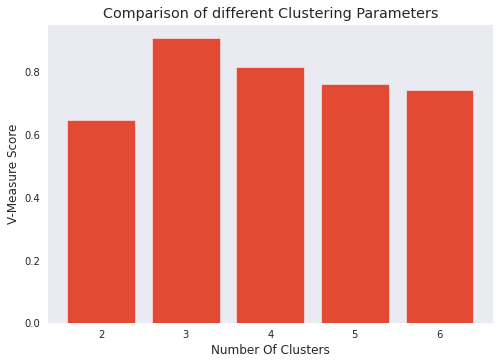

In [ ]:
# List of different types of covariance parameters
clustersRange = [2, 3, 4, 5, 6]

# List of V-Measure Scores for different models
v_scores = []

for i in clustersRange:   
    vmeasure = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    label = vmeasure.fit_predict(scaled_data)            
    labels = vmeasure.labels_
    # Evaluating the performance
    v_scores.append(v_measure_score(dataset.target, labels))
print("V-Measure Scores for number of clusters :") 
print(v_scores)

#bar graph to compare Clustering models
plt.bar(clustersRange, v_scores)
plt.xlabel('Number Of Clusters')
plt.ylabel('V-Measure Score')
plt.title('Comparison of different Clustering Parameters')
plt.show()

# **Adjusted Rand Index**

The Adjusted Rand Index is used to measure the similarity between two clusters. So, this measure should be high as possible.

Adjusted Rand Scores for number of clusters :
[0.4847385885049859, 0.9310001175059304, 0.7697432844874517, 0.6837934061868676, 0.6550927069671628]


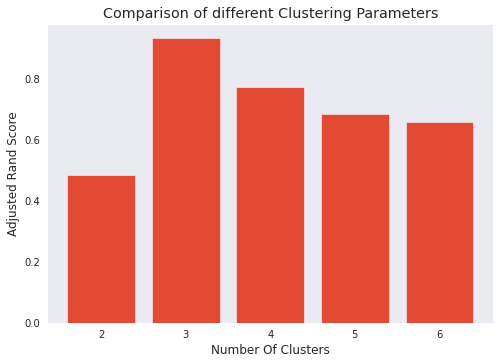

In [ ]:
# List of different types of covariance parameters
clustersRange = [2, 3, 4, 5, 6]

# List of Adjusted Rand Scores for different models
r_scores = []

for i in clustersRange:   
    ari = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    label = ari.fit_predict(scaled_data)            
    labels = ari.labels_
    # Evaluating the performance
    r_scores.append(adjusted_rand_score(dataset.target, labels))
    
print("Adjusted Rand Scores for number of clusters :") 
print(r_scores)

plt.bar(clustersRange, r_scores)
plt.xlabel('Number Of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.title('Comparison of different Clustering Parameters')
plt.show()

## **5. Divisive Clustering**

# **Training**

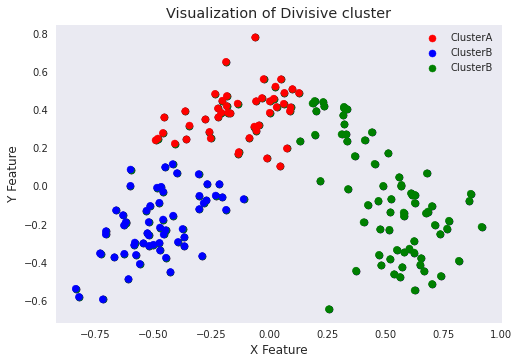

In [ ]:
#trained the model on dataset
bisect_means = BisectingKMeans(n_clusters= 3, n_init = 1 , random_state= 0 )
bkm = bisect_means.fit_predict(pca)
labels = bisect_means.labels_

#mapping color to label clusters
colours = {}
colours[0] = 'red'
colours[1] = 'blue'
colours[2] = 'green'

#color for each data points
l = [colours[bkm] for bkm in labels]

#visulaize the cluster with scatter plot
plt.scatter(pca[:, 0], pca[:, 1], color = 'red', label = "ClusterA")
plt.scatter(pca[:, 0], pca[:, 1], color = 'blue', label = "ClusterB")
plt.scatter(pca[:, 0], pca[:, 1], color = 'green', label = "ClusterB")
plt.scatter(pca[:, 0], pca[:, 1], c = l)
plt.title('Visualization of Divisive cluster')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.legend()
plt.show()

# **Internal Evaluation Clustering**
## **Silhouette Score**

Silhouette Score is a metric used to calculate the goodness of a clustering technique. Ranges from -1 to 1


In [ ]:
#finding average silhouette score

for i in range(2,13):    
      bisectSilh = BisectingKMeans(n_clusters= i, n_init = 1 , random_state= 0 )
      bisectSillabel = bisectSilh.fit_predict(scaled_data)
      silhouette_avg = silhouette_score(scaled_data, bisectSillabel)
      print("For n_clusters = {} The average silhouette_score is : {}".format (i,silhouette_avg)) 

For n_clusters = 2 The average silhouette_score is : 0.2988493511327317
For n_clusters = 3 The average silhouette_score is : 0.2740420213942809
For n_clusters = 4 The average silhouette_score is : 0.23896500478757998
For n_clusters = 5 The average silhouette_score is : 0.21921748101492222
For n_clusters = 6 The average silhouette_score is : 0.14178020382745563
For n_clusters = 7 The average silhouette_score is : 0.11084957820708433
For n_clusters = 8 The average silhouette_score is : 0.11563004282704943
For n_clusters = 9 The average silhouette_score is : 0.11300276063897081
For n_clusters = 10 The average silhouette_score is : 0.1003844584798503
For n_clusters = 11 The average silhouette_score is : 0.10453722517924259
For n_clusters = 12 The average silhouette_score is : 0.10220254392523027


# **Calinski-Harabasz Index**


It is also known as the Variance Ratio Criterion, it is the sum of between-clusters dispersion the higher the score , the better the performances.

In [ ]:
for i in range(2,13):    
      bisectCalin = BisectingKMeans(n_clusters= i, n_init = 1 , random_state= 0 )
      bisectCalinlabel = bisectCalin.fit_predict(scaled_data)
      #Find the score of Calinski Harabasz Score
      calinski_avg = calinski_harabasz_score(scaled_data, bisectCalinlabel)
      print("For n_clusters = {} The average calinski_harabasz_score is : {}".format (i,calinski_avg))

For n_clusters = 2 The average calinski_harabasz_score is : 84.64882591413385
For n_clusters = 3 The average calinski_harabasz_score is : 75.32990970907831
For n_clusters = 4 The average calinski_harabasz_score is : 64.66053730837498
For n_clusters = 5 The average calinski_harabasz_score is : 53.20187512259748
For n_clusters = 6 The average calinski_harabasz_score is : 45.17734159499308
For n_clusters = 7 The average calinski_harabasz_score is : 40.99963713379877
For n_clusters = 8 The average calinski_harabasz_score is : 37.3453122582393
For n_clusters = 9 The average calinski_harabasz_score is : 34.46552559339106
For n_clusters = 10 The average calinski_harabasz_score is : 31.75425574103499
For n_clusters = 11 The average calinski_harabasz_score is : 29.674355828057603
For n_clusters = 12 The average calinski_harabasz_score is : 28.309805994394686


# **Davies-Bouldin Index**


The average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [ ]:
for i in range(2,13):    
      bisectDavisCluster = BisectingKMeans(n_clusters= i, n_init = 1 , random_state= 0 )
      bisectdavisLabels = bisectDavisCluster.fit_predict(scaled_data)
      #Find the score of Davies Bouldin Index
      davis_avg = davies_bouldin_score(scaled_data, bisectdavisLabels)
      print("For n_clusters = {} The average davies_bouldin_score is : {}".format (i,davis_avg)) 

For n_clusters = 2 The average davies_bouldin_score is : 1.3488967022869576
For n_clusters = 3 The average davies_bouldin_score is : 1.3745952315642935
For n_clusters = 4 The average davies_bouldin_score is : 1.6563827613997966
For n_clusters = 5 The average davies_bouldin_score is : 1.8816985807632747
For n_clusters = 6 The average davies_bouldin_score is : 2.123429306841384
For n_clusters = 7 The average davies_bouldin_score is : 2.153296180530449
For n_clusters = 8 The average davies_bouldin_score is : 2.0585071982594654
For n_clusters = 9 The average davies_bouldin_score is : 2.001399354777734
For n_clusters = 10 The average davies_bouldin_score is : 2.0616388940206813
For n_clusters = 11 The average davies_bouldin_score is : 2.0431004937739576
For n_clusters = 12 The average davies_bouldin_score is : 1.985280316539197


# **External Evaluation Metrics**

# **V-Measure**
The V-measure is the harmonic mean between homogeneity and completeness, this metric is independent of the class labels, number of clusters and size of the data. Range of V-measure is between 0 and 1, 1 stands for perfectly homogeneous labeling.


V-Measure Scores for number of clusters :
[0.48521628370833625, 0.7090825648457307, 0.7599755629004417, 0.7105894368097531, 0.6586902020694853]


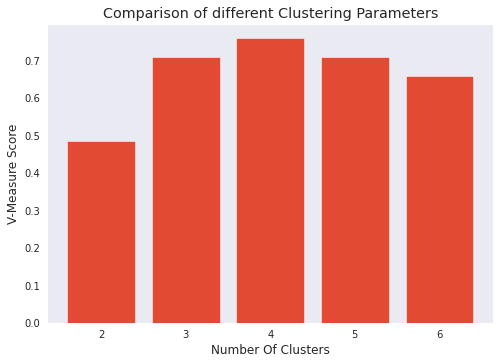

In [ ]:
# List of different types of covariance parameters
clustersRange = [2, 3, 4, 5, 6]

# List of V-Measure Scores for different models
v_scores = []

for i in clustersRange:   
    vmeasure = BisectingKMeans(n_clusters= i, n_init = 1 , random_state= 0 )
    label = vmeasure.fit_predict(scaled_data)            
    labels = vmeasure.labels_
    # Evaluating the performance
    v_scores.append(v_measure_score(dataset.target, labels))
    
print("V-Measure Scores for number of clusters :") 
print(v_scores)

#bar graph to compare models
plt.bar(clustersRange, v_scores)
plt.xlabel('Number Of Clusters')
plt.ylabel('V-Measure Score')
plt.title('Comparison of different Clustering Parameters')
plt.show()

# **Adjusted Rand Index**
The Adjusted Rand Index is used to measure the similarity between two clusters. So, this measure should be high as possible.


Adjusted Rand Scores for number of clusters :
[0.3733502581375795, 0.6624498154081442, 0.747643986928045, 0.6620668848679008, 0.5273792074558992]


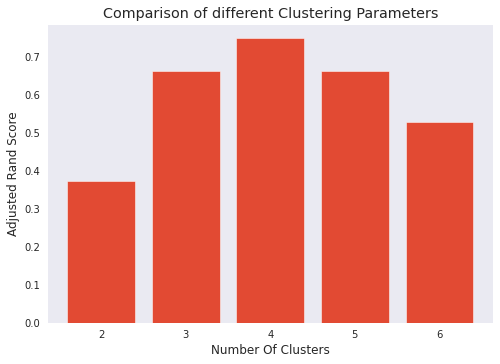

In [ ]:
# List of different types of covariance parameters
clustersRange = [2, 3, 4, 5, 6]

# List of Adjusted Rand Scores for different models
r_scores = []

for i in clustersRange:   
    ari = BisectingKMeans(n_clusters= i, n_init = 1 , random_state= 0 )
    label = ari.fit_predict(scaled_data)            
    labels = ari.labels_
    # Evaluating the performance
    r_scores.append(adjusted_rand_score(dataset.target, labels))


print("Adjusted Rand Scores for number of clusters :") 
print(r_scores)

plt.bar(clustersRange, r_scores)
plt.xlabel('Number Of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.title('Comparison of different Clustering Parameters')
plt.show()

## **6. EM-GMM Clustering**


In [ ]:
# Pre-processing
#Feature Scaling done using the MinMax scaler to normalize the dataset to have values between 0 and 1. 
dataset = lw
data = lw.data
scaler = mms() #MinMax scaler 
scaler.fit(data)
scaled_data = scaler.transform(data)   

In [ ]:
# Dimensionality of the data is reduced to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(scaled_data)

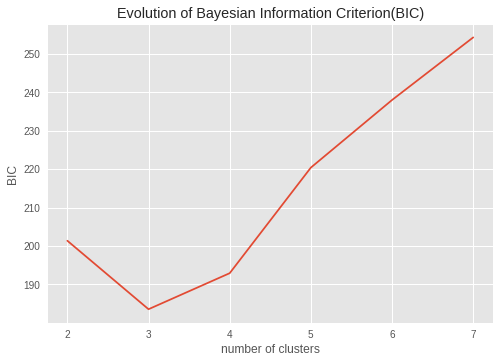

In [ ]:
#Evaluate k with BIC
#Determines a suitable number of clusters using the Bayesian Information Criterion (BIC).


n_clusters=range(2,8)
bic = []
for k in n_clusters:
    em_model= GaussianMixture(n_components=k,random_state=42)
    em_model.fit(X_principal)
    bic.append(em_model.bic(X_principal))

plt.figure()
plt.title("Evolution of Bayesian Information Criterion(BIC)")
plt.plot(n_clusters, bic)
plt.ylabel("BIC")
plt.xlabel("number of clusters")
plt.xticks(n_clusters)
plt.show()

#The BIC clearly indicates that 3 would be the optimal number of clusters.
#The k that minimizes the BIC score is the optimal number of clusters according to the BIC scoring scheme

In [ ]:
#Apply Gaussian Mixture (Expectation-Maximization)
em_model = GaussianMixture(n_components=3,covariance_type='spherical', random_state=42)
em_model.fit(scaled_data)
pred = em_model.predict(scaled_data)

In [ ]:
unique, counts = np.unique(pred, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 72],
       [ 1, 55],
       [ 2, 51]])

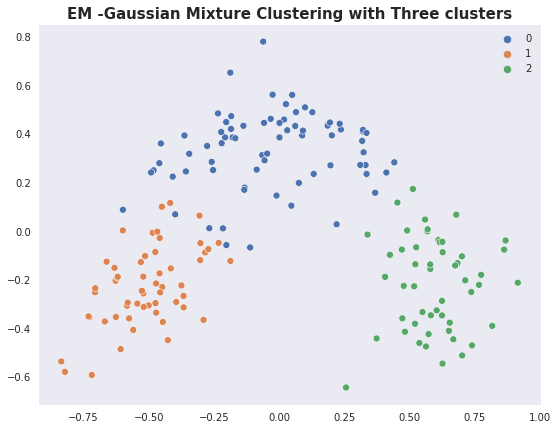

In [ ]:
#Visualize the data in 2D
pca = PCA(n_components=3)
pca = pca.fit_transform(scaled_data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=pred, x=pca[:,0], y=pca[:,1],palette="deep")
plt.title("EM -Gaussian Mixture Clustering with Three clusters",fontsize=15,fontweight="bold")
plt.show()

##**Internal Evaluation of EM Clustering**

In [ ]:
print("\n\nInternal Evaluation of EM Clustering\n")
s = silhouette_score(scaled_data, pred)
c = calinski_harabasz_score(scaled_data, pred)
d = davies_bouldin_score(scaled_data, pred) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

#better score with PCA:
print("\n\nInternal Evaluation of EM Clustering with PCA:\n")
s = silhouette_score(X_principal, pred)
c = calinski_harabasz_score(X_principal, pred)
d = davies_bouldin_score(X_principal, pred) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))




Internal Evaluation of EM Clustering

silhouette_score =  0.294 
calinski_harabasz_score =  81.745 
davies_bouldin_score =  1.313


Internal Evaluation of EM Clustering with PCA:

silhouette_score =  0.544 
calinski_harabasz_score =  346.421 
davies_bouldin_score =  0.603


##**External Evaluation of EM Clustering**

###V-Measure
#####This evaluation metric is independent of the number of class labels, the number of clusters, the size of the data and the clustering algorithm used and is a very reliable metric. Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling.

In [ ]:
 #V-Measure
v_score = v_measure_score(dataset.target, labels)
print("The V-Measure of Gaussian Mixture model is:", v_score)


The V-Measure of Gaussian Mixture model is: 0.6586902020694853


##Adjusted Rand Index

The Adjusted Rand Index is used to measure the similarity of datapoints presents in the clusters. So, this measure should be high as possible.


In [ ]:
# List of R Scores for different models
r_score = adjusted_rand_score(dataset.target, labels)
print("The Adjusted Rand Index of Gaussian Mixture model is:",r_score)


The Adjusted Rand Index of Gaussian Mixture model is: 0.5273792074558992


# <i>PART III – Application: Classification: Training and Testing (Group Submission)

Classification methods used:

1. K Nearest Neighbors(KNN)
2. Support Vector Machines(SVM)
3. Naive Bayes
4. Decision Tree
5. Random Forest

## **1. K Nearest Neighbors Classifier**


In [ ]:
class KNN:
  def __init__(self) -> None:
    return None

#Splitting the dataset into the Training set and Test set
  def split_the_dataset(self, dataset):
    X = dataset.data
    y = dataset.target
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.33, random_state = 42)
    sc = StandardScaler()   #Feature Scaling   
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

  def build_machine_model(self, dataset):  
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)                 
    classifier = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean', p = 2) #euclidean dist.
    trained_model=classifier.fit(X_train,y_train)
    return trained_model

  def apply_k_fold_validation(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)  
    classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 8)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))     

  def evaluate_accuracy(self, dataset):
    # The following metrics are used:
    # balanced accuracy, precision, recall, F1 Score, ROC AUC.
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    print('X_train shape ==>', X_train.shape)
    print('X_test shape ==>', X_test.shape)
    print('y_train shape ==>', y_train.shape)
    print('y_test shape ==>', y_test.shape)
    print('*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n\n')

    trained_model = self.build_machine_model(dataset)
    # Make predictions for the test set
    y_pred_test = trained_model.predict(X_test)

    # ACCURACY SCORE
    print("Accuracy score measures how many labels the model got right out of the total number of predictions.")
    KNN_accuracy_score = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    print(f'Accuracy score: {KNN_accuracy_score}%\n\n')

    # CLASSIFICATION REPORT
    print('Classification report:')
    print(classification_report(y_test, y_pred_test), '\n')

    # ROC AUC Score
    pred_prob = trained_model.predict_proba(X_test)
    print('ROC AUC Score:')
    print(roc_auc_score(y_test, pred_prob,average='macro',multi_class='ovr'), '\n')

    # CONFUSION MATRIX
    print('Confusion Matrix:')
    KNN_confusion_matrix = confusion_matrix(y_test, y_pred_test)
    print(KNN_confusion_matrix, '\n')
    print('Displaying the confusion matrix in heatmap:')
    sns.heatmap(KNN_confusion_matrix, cmap = plt.cm.Blues, annot = True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title("KNN Classifier's Confusion Matrix")
    plt.show()
     
    return None

  def return_prob(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    trained_model = self.build_machine_model(dataset)
    pred_prob = trained_model.predict_proba(X_test)[:, 1]
    return pred_prob



### **TRAINING:** Training the KNN model on the Training Set

In [ ]:
knn = KNN()
print(knn.build_machine_model(lw))

KNeighborsClassifier(metric='euclidean', n_neighbors=3)


### **EVALUATION:** Evaluating the KNN model on the Test Set

X_train shape ==> (119, 13)
X_test shape ==> (59, 13)
y_train shape ==> (119,)
y_test shape ==> (59,)
*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*


Accuracy score measures how many labels the model got right out of the total number of predictions.
Accuracy score: 96.61%


Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.92      0.96        24
           2       0.94      1.00      0.97        15

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59
 

ROC AUC Score:
1.0 

Confusion Matrix:
[[20  0  0]
 [ 1 22  1]
 [ 0  0 15]] 

Displaying the confusion matrix in heatmap:


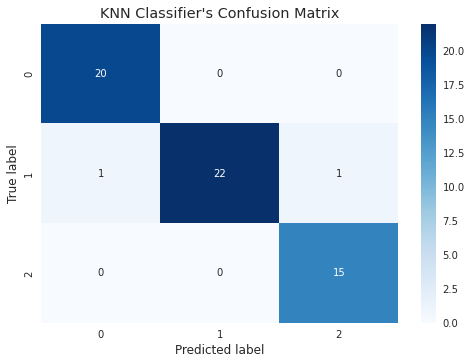

In [ ]:
knn.evaluate_accuracy(lw)

In [ ]:
knn.apply_k_fold_validation(lw) 

Accuracy: 94.17 %
Standard Deviation: 7.02 %


##** 2. Random Forest Classifier**

In [ ]:
class RandomForest:
  def __init__(self) -> None:
    return None

  def split_the_dataset(self, dataset):
    X = dataset.data
    y = dataset.target
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.33, random_state = 69)
    return X_train, X_test, y_train, y_test
    
  def build_machine_model(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    model = rfc(max_depth = 5, random_state = 69)
    trained_model = model.fit(X_train, y_train)     # training the machine learning model
    return trained_model


  def apply_k_fold_validation(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)  
    model = rfc(max_depth = 5, random_state = 69)
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 8) #K=8
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

  def evaluate_accuracy(self, dataset):
    # The following metrics are used:
    # balanced accuracy, precision, recall, F1 Score, ROC AUC.
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    print('X_train shape ==>', X_train.shape)
    print('X_test shape ==>', X_test.shape)
    print('y_train shape ==>', y_train.shape)
    print('y_test shape ==>', y_test.shape)
    print('*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n\n')

    trained_model = self.build_machine_model(dataset)
    # Make predictions for the test set
    y_pred_test = trained_model.predict(X_test)

    # ACCURACY SCORE
    print("Accuracy score measures how many labels the model got right out of the total number of predictions.")
    random_forest_accuracy_score = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    print(f'Accuracy score: {random_forest_accuracy_score}%\n\n')

    # CLASSIFICATION REPORT
    print('Classification report:')
    print(classification_report(y_test, y_pred_test), '\n')

    # ROC AUC Score
    pred_prob = trained_model.predict_proba(X_test)
    print('ROC AUC Score:')
    print(roc_auc_score(y_test, pred_prob, multi_class='ovr'), '\n')

    # CONFUSION MATRIX
    print('Confusion Matrix:')
    random_forest_confusion_matrix = confusion_matrix(y_test, y_pred_test)
    print(random_forest_confusion_matrix, '\n')
    print('Displaying the confusion matrix in heatmap:')
    sns.heatmap(random_forest_confusion_matrix, cmap = plt.cm.Blues, annot = True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title("Random Forest Classifier's Confusion Matrix")

  def return_prob(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    trained_model = self.build_machine_model(dataset)
    pred_prob = trained_model.predict_proba(X_test)[::, 1]
    return pred_prob


### **TRAINING:** Training the Random Forest model on the Training Set

In [ ]:
random_forest_model = RandomForest() # making an object of the RandomForest class
print(random_forest_model.build_machine_model(lw))     # training the random forest classifier

RandomForestClassifier(max_depth=5, random_state=69)


### **EVALUATION:** Evaluating the Random Forest model on the Test Set

X_train shape ==> (119, 13)
X_test shape ==> (59, 13)
y_train shape ==> (119,)
y_test shape ==> (59,)
*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*


Accuracy score measures how many labels the model got right out of the total number of predictions.
Accuracy score: 96.61%


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.96      0.96      0.96        26
           2       1.00      1.00      1.00        15

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59
 

ROC AUC Score:
0.997090984895863 

Confusion Matrix:
[[17  1  0]
 [ 1 25  0]
 [ 0  0 15]] 

Displaying the confusion matrix in heatmap:


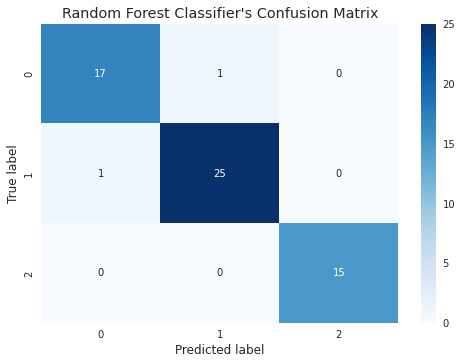

In [ ]:
random_forest_model.evaluate_accuracy(lw) 

### Cross-Validation for Random Forest

In [ ]:
random_forest_model.apply_k_fold_validation(lw) 

Accuracy: 99.17 %
Standard Deviation: 2.20 %


## **3. Support Vector Machines (SVMs)**



In [ ]:
class SupportVectorMachineClassifier:
  def __init__(self) -> None:
    return None

  def split_the_dataset(self, dataset):
    X = dataset.data
    y = dataset.target
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.33, random_state = 69)
    return X_train, X_test, y_train, y_test
    
  def build_machine_model(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    model = SVC(kernel = 'rbf', probability = True, C = 1, gamma = 'scale')
    trained_model = model.fit(X_train, y_train)     # training the machine learning model
    return trained_model


  def apply_k_fold_validation(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)  
    model = SVC(kernel = 'rbf', probability = True, C = 1, gamma = 'scale')
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 8) # K=8
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

  def evaluate_accuracy(self, dataset):
    # The following metrics are used:
    # balanced accuracy, precision, recall, F1 Score, ROC AUC.
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    print('X_train shape ==>', X_train.shape)
    print('X_test shape ==>', X_test.shape)
    print('y_train shape ==>', y_train.shape)
    print('y_test shape ==>', y_test.shape)
    print('*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n\n')

    trained_model = self.build_machine_model(dataset)
    # Make predictions for the test set
    y_pred_test = trained_model.predict(X_test)

    # ACCURACY SCORE
    print("Accuracy score measures how many labels the model got right out of the total number of predictions.")
    random_forest_accuracy_score = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    print(f'Accuracy score: {random_forest_accuracy_score}%\n\n')

    # CLASSIFICATION REPORT
    print('Classification report:')
    print(classification_report(y_test, y_pred_test), '\n')

    # ROC AUC Score
    pred_prob = trained_model.predict_proba(X_test)
    print('ROC AUC Score:')
    print(roc_auc_score(y_test, pred_prob, multi_class='ovr'), '\n')

    # CONFUSION MATRIX
    print('Confusion Matrix:')
    random_forest_confusion_matrix = confusion_matrix(y_test, y_pred_test)
    print(random_forest_confusion_matrix, '\n')
    print('Displaying the confusion matrix in heatmap:')
    sns.heatmap(random_forest_confusion_matrix, cmap = plt.cm.Blues, annot = True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title("Support Vector Classifier's Confusion Matrix")

  def return_prob(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    trained_model = self.build_machine_model(dataset)
    pred_prob = trained_model.predict_proba(X_test)[::, 1]
    return pred_prob

### **TRAINING:** Training the Support Vector Machines model on the Training Set

In [ ]:
svm_trained_model = SupportVectorMachineClassifier()
svm_trained_model.build_machine_model(lw)

SVC(C=1, probability=True)

### **EVALUATION:** Evaluating the Support Vector Machines model on the Test Set

X_train shape ==> (119, 13)
X_test shape ==> (59, 13)
y_train shape ==> (119,)
y_test shape ==> (59,)
*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*


Accuracy score measures how many labels the model got right out of the total number of predictions.
Accuracy score: 66.1%


Classification report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.67      0.69      0.68        26
           2       0.46      0.40      0.43        15

    accuracy                           0.66        59
   macro avg       0.64      0.64      0.64        59
weighted avg       0.65      0.66      0.66        59
 

ROC AUC Score:
0.8652039469112639 

Confusion Matrix:
[[15  0  3]
 [ 4 18  4]
 [ 0  9  6]] 

Displaying the confusion matrix in heatmap:


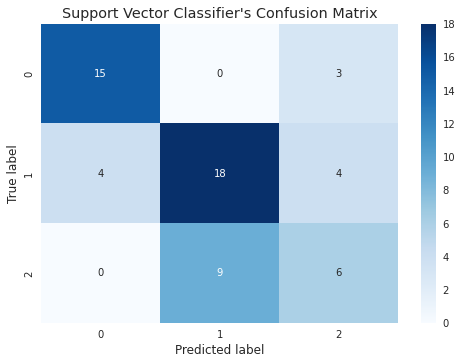

In [ ]:
svm_trained_model.evaluate_accuracy(lw)

### Cross Validation with K=8

In [ ]:
svm_trained_model.apply_k_fold_validation(lw)

Accuracy: 72.20 %
Standard Deviation: 13.25 %


## **4. Naive Bayes Classifier**

In [ ]:
class NaiveBayesClassifier:
  def __init__(self) -> None:
    return None

  def split_the_dataset(self, dataset):
    X = dataset.data
    y = dataset.target
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.33, random_state = 69)
    return X_train, X_test, y_train, y_test
    
  def build_machine_model(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    model = GaussianNB()
    trained_model = model.fit(X_train, y_train)     # training the machine learning model
    return trained_model


  def apply_k_fold_validation(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)  
    model = GaussianNB()
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 8)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

  def evaluate_accuracy(self, dataset):
    # The following metrics are used:
    # balanced accuracy, precision, recall, F1 Score, ROC AUC.
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    print('X_train shape ==>', X_train.shape)
    print('X_test shape ==>', X_test.shape)
    print('y_train shape ==>', y_train.shape)
    print('y_test shape ==>', y_test.shape)
    print('*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n\n')

    trained_model = self.build_machine_model(dataset)
    # Make predictions for the test set
    y_pred_test = trained_model.predict(X_test)

    # ACCURACY SCORE
    print("Accuracy score measures how many labels the model got right out of the total number of predictions.")
    random_forest_accuracy_score = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    print(f'Accuracy score: {random_forest_accuracy_score}%\n\n')

    # CLASSIFICATION REPORT
    print('Classification report:')
    print(classification_report(y_test, y_pred_test), '\n')

    # ROC AUC Score
    pred_prob = trained_model.predict_proba(X_test)
    print('ROC AUC Score:')
    print(roc_auc_score(y_test, pred_prob, multi_class='ovr'), '\n')

    # CONFUSION MATRIX
    print('Confusion Matrix:')
    random_forest_confusion_matrix = confusion_matrix(y_test, y_pred_test)
    print(random_forest_confusion_matrix, '\n')
    print('Displaying the confusion matrix in heatmap:')
    sns.heatmap(random_forest_confusion_matrix, cmap = plt.cm.Blues, annot = True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title("Naive Bayes Classifier's Confusion Matrix")
  
  def return_prob(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    trained_model = self.build_machine_model(dataset)
    pred_prob = trained_model.predict_proba(X_test)
    return pred_prob[::, 1]

### **TRAINING:** Training the Naive Bayes model on the Training Set

In [ ]:
naive_bayes_model = NaiveBayesClassifier()
naive_bayes_model.build_machine_model(lw)

GaussianNB()

### **EVALUATION:** Evaluating the Naive Bayes model on the Test Set

X_train shape ==> (119, 13)
X_test shape ==> (59, 13)
y_train shape ==> (119,)
y_test shape ==> (59,)
*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*


Accuracy score measures how many labels the model got right out of the total number of predictions.
Accuracy score: 96.61%


Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.92      0.96        26
           2       0.94      1.00      0.97        15

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59
 

ROC AUC Score:
0.999159828428121 

Confusion Matrix:
[[18  0  0]
 [ 1 24  1]
 [ 0  0 15]] 

Displaying the confusion matrix in heatmap:


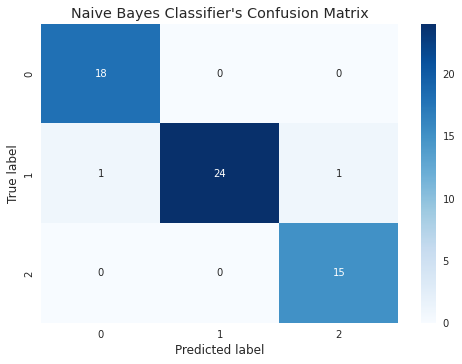

In [ ]:
naive_bayes_model.evaluate_accuracy(lw)

### K-Fold validation

In [ ]:
naive_bayes_model.apply_k_fold_validation(lw)

Accuracy: 98.33 %
Standard Deviation: 2.89 %


## **5. Decision Tree Classifier**

In [ ]:
class DecisionTreeClasifier:
  def __init__(self) -> None:
    return None

  #splitting the dataset
  def split_the_dataset(self, dataset):
    X = dataset.data
    y = dataset.target
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.33, random_state = 69)
    return X_train, X_test, y_train, y_test
    
  #Training the model
  def build_machine_model(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
    trained_model = classifier.fit(X_train, y_train)     # training the machine learning model
    return trained_model


  def apply_k_fold_validation(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)  
    classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 8)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

  def evaluate_accuracy(self, dataset):
    # The following metrics are used:
    # balanced accuracy, precision, recall, F1 Score, ROC AUC.
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    print('X_train shape ==>', X_train.shape)
    print('X_test shape ==>', X_test.shape)
    print('y_train shape ==>', y_train.shape)
    print('y_test shape ==>', y_test.shape)
    print('*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n\n')

    trained_model = self.build_machine_model(dataset)
    # Predictions for test set
    y_pred_test = trained_model.predict(X_test)

    # ACCURACY SCORE
    print("Accuracy score measures how many labels the model got right out of the total number of predictions.")
    decision_tree_accuracy_score = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    print(f'Accuracy score: {decision_tree_accuracy_score}%\n\n')

    # CLASSIFICATION REPORT
    print('Classification report:')
    print(classification_report(y_test, y_pred_test), '\n')

    # ROC AUC Score
    pred_prob = trained_model.predict_proba(X_test)
    print('ROC AUC Score:')
    print(roc_auc_score(y_test, pred_prob, multi_class='ovr'), '\n')

    # CONFUSION MATRIX
    print('Confusion Matrix:')
    desicion_tree_confusion_matrix = confusion_matrix(y_test, y_pred_test)
    print(desicion_tree_confusion_matrix, '\n')
    print('Displaying the confusion matrix in heatmap:')
    sns.heatmap(desicion_tree_confusion_matrix, cmap = plt.cm.Blues, annot = True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title("Decision Tree Classifier's Confusion Matrix")
  
  def return_prob(self, dataset):
    X_train, X_test, y_train, y_test = self.split_the_dataset(dataset)
    trained_model = self.build_machine_model(dataset)
    pred_prob = trained_model.predict_proba(X_test)
    return pred_prob[::, 1]

### **TRAINING:** Training the Decision Tree model on the Training Set

In [ ]:
decision_tree_model = DecisionTreeClasifier() #object of Decision Tree Clasifier
decision_tree_model.build_machine_model(lw)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### **EVALUATION:** Evaluating the Decision Tree model on the Test Set

X_train shape ==> (119, 13)
X_test shape ==> (59, 13)
y_train shape ==> (119,)
y_test shape ==> (59,)
*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*


Accuracy score measures how many labels the model got right out of the total number of predictions.
Accuracy score: 84.75%


Classification report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.87      0.77      0.82        26
           2       0.88      0.93      0.90        15

    accuracy                           0.85        59
   macro avg       0.85      0.86      0.85        59
weighted avg       0.85      0.85      0.85        59
 

ROC AUC Score:
0.8929213965799332 

Confusion Matrix:
[[16  2  0]
 [ 4 20  2]
 [ 0  1 14]] 

Displaying the confusion matrix in heatmap:


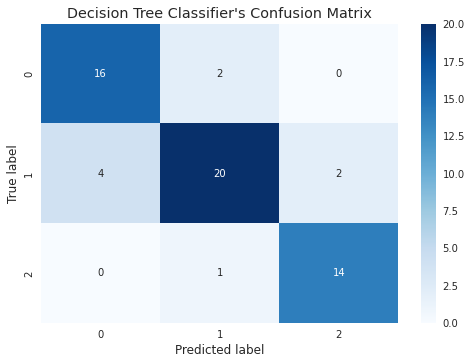

In [ ]:
decision_tree_model.evaluate_accuracy(lw)

In [ ]:
decision_tree_model.apply_k_fold_validation(lw)

Accuracy: 88.27 %
Standard Deviation: 7.96 %


## **ROC AUC Curve**

The ROC curve is used for binary classification. We are going to do the 'One VS All' approach. In this approach we will:


*1.   Plot ROC curve for class_0 VS Not_Class_0*<br>
*2.   Plot ROC curve for class_1 VS Not_Class_1*<br>
*3.   Plot ROC curve for class_2 VS Not_Class_2*<br>


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
def plot_roc_curve(class_i):
  X = load_wine().data
  y = load_wine().target
  y = y == class_i
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)

  # K-Nearest Neighbour Classifier
  knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean', p = 2)
  knn.fit(X_train, y_train)

  # Support Vector Machines Classifier
  svc = SVC(random_state = 6)
  svc.fit(X_train, y_train)

  # Random Forest Classifier
  rfc = RandomForestClassifier(n_estimators=10, random_state = 6)
  rfc.fit(X_train, y_train)

  # Decision Tree Classifier
  dtc = DecisionTreeClassifier(criterion='entropy', random_state = 6)
  dtc.fit(X_train, y_train)

  # Naive Bayes Classifier
  nbc = GaussianNB()
  nbc.fit(X_train, y_train)

  # plotting the ROC graph
  ax = plt.gca()
  svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax = ax, alpha = 0.8)
  knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax = ax, alpha = 0.8)
  rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax = ax, alpha = 0.8)
  dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test, ax = ax, alpha = 0.8)
  nbc_disp = RocCurveDisplay.from_estimator(nbc, X_test, y_test, ax = ax, alpha = 0.8)
  ax.yaxis.grid(True, which='major')
  ax.xaxis.grid(True, which='major')
  ax.plot(ax = ax, alpha = 0.8)
  plt.plot([0,1], [0,1], color = 'orange', linestyle = '--')
  plt.show()

THE ROC CURVE FOR CLASS_0 VS NOT_CLASS_0


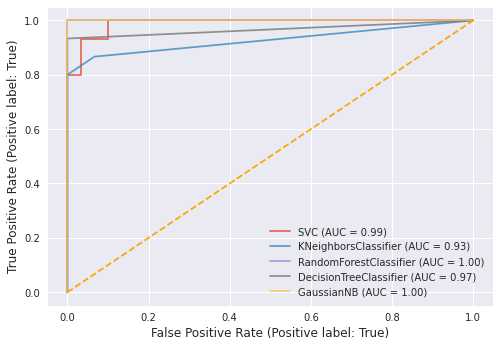


THE ROC CURVE FOR CLASS_1 VS NOT_CLASS_1


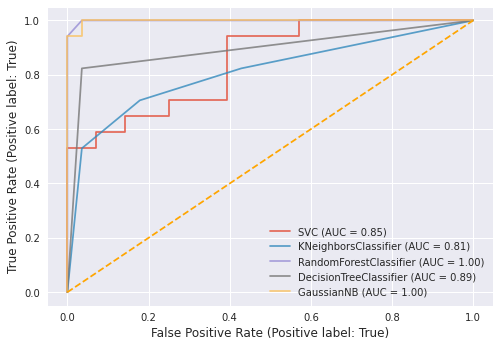


THE ROC CURVE FOR CLASS_2 VS NOT_CLASS_2


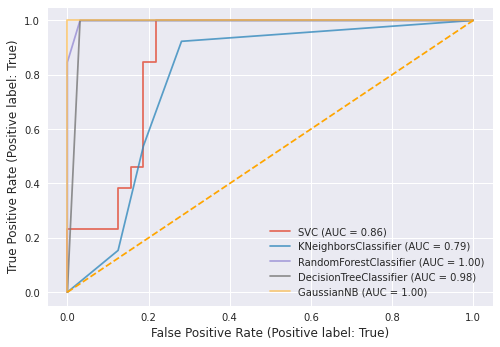

In [ ]:
# plotting the roc curve for class_0
for i in range(3):
  print(f"THE ROC CURVE FOR CLASS_{i} VS NOT_CLASS_{i}")
  plot_roc_curve(i)
  print()

# **References**

1. MinMax scaler.  Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html. (Accessed: 19 February 2023)

2. Yellowbrick KElbowVisualizer. Available at: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html. (Accessed: 19 February 2023)

3. Yellowbrick Silhouette method. Available at: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html.(Accessed: 19 February 2023)

4. Ester, M, Kriegel, H P, Sander, J, and Xiaowei, Xu. A density-based algorithm 
for discovering clusters in large spatial databases with noise. United States: N. p., 1996. Web. (Accessed: 19 February 2023)

5. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html.(Accessed: 19 February 2023). 

6. Available at: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html. (Accessed: 19 February 2023).

7. T. Zhang, R. Ramakrishnan and M. Livny, “BIRCH: an efficient data clustering method for very large databases” in ACM Sigmod Record, ACM, vol. 25, pp. 103–114.(Accessed: 19 February 2023)

8. Available at:https://owardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6 (Accessed: 19 February 2023).

9. Peter J. Rousseeuw (1987). “Silhouettes: a Graphical Aid to the Interpretation and Validation of Cluster Analysis” . Computational and Applied Mathematics 20: 53–65. Available at : https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index(Accessed: February 20, 2023)

10. Caliński, T., & Harabasz, J. (1974). “A Dendrite Method for Cluster Analysis”. Communications in Statistics-theory and Methods 3: 1-27.Available at :https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index (Accessed: February 20, 2023)

11. Davies, David L.; Bouldin, Donald W. (1979). “A Cluster Separation Measure” IEEE Transactions on Pattern Analysis and Machine Intelligence. PAMI-1 (2): 224-227.Available at :https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index (Accessed: February 20, 2023)

12. Available at: https://www.geeksforgeeks.org/ml-v-measure-for-evaluating-clustering-performance/. (Accessed: 19 February 2023).

13. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html. (Accessed: 19 February 2023). 

14. Decision tree algorithm in Machine Learning - Javatpoint (no date) www.javatpoint.com. Available at: https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm (Accessed: February 19, 2023).

15. Available at: https://stackoverflow.com/questions/52887562/how-to-implement-gmm-clustering-em-algorighmexpectation-maximisation-algorithm (Accessed: February 18, 2023).

16. Available at: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py (Accessed: February 18, 2023).

17. Available at: https://medium.com/mlearning-ai/try-out-bayesian-gaussian-mixture-clustering-on-sklearns-wine-toy-dataset-6c37cb510a62 (Accessed: February 18, 2023).

18. Available at: https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6 (Accessed: February 18, 2023).





**-----------------------------------------------------------------------end of notebook-----------------------------------------------------------------------**